<a href="https://colab.research.google.com/github/khushee-g/EEG/blob/main/Non-simplified%20Regression_Visualization_Prediction_w_Age_and_Sex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Prediction Model for Behavior Disorder with Age, Sex, and All EEG Channels

In [15]:
import numpy as np # Linear algebra
import pandas as pd
# ModelLing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics

In [16]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np

# Read in data as a dataframe
data1 = pd.read_csv('/content/numericBehaviorWithAgeOnly.csv')

In [17]:
data1.shape
data1.head(2)

,age,specific_disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,AB.A.delta.g.F8,AB.A.delta.h.T3,...,COH.A.delta.i.C3.p.P4,COH.A.delta.i.C3.q.T6,COH.A.delta.i.C3.r.O1,COH.A.delta.i.C3.s.O2,COH.A.delta.j.Cz.k.C4,COH.A.delta.j.Cz.l.T4,COH.A.delta.j.Cz.m.T5,COH.A.delta.j.Cz.n.P3,COH.A.delta.j.Cz.o.Pz,COH.A.delta.j.Cz.p.P4
0,34.16,4,72.431249,69.386059,62.775437,69.193931,69.447900,69.042085,57.324333,41.658465,...,38.430096,35.788543,30.735163,23.983279,90.007737,61.732586,34.488338,60.451504,70.739249,54.527141
1,42.35,4,19.579138,19.703305,23.000027,31.034078,22.461115,23.616729,50.770251,14.458573,...,49.485011,23.732740,33.724609,27.969158,87.062096,30.399197,30.791722,54.314055,66.564799,74.223444


In [18]:
#Y = data1['specific_disorder']
#X = data1.loc['sex','age':'AB.A.delta.a.FP1':]
#Y

Y = data1['specific_disorder']
X = data1.drop(['specific_disorder'], axis=1)

X

,age,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,AB.A.delta.g.F8,AB.A.delta.h.T3,AB.A.delta.i.C3,...,COH.A.delta.i.C3.p.P4,COH.A.delta.i.C3.q.T6,COH.A.delta.i.C3.r.O1,COH.A.delta.i.C3.s.O2,COH.A.delta.j.Cz.k.C4,COH.A.delta.j.Cz.l.T4,COH.A.delta.j.Cz.m.T5,COH.A.delta.j.Cz.n.P3,COH.A.delta.j.Cz.o.Pz,COH.A.delta.j.Cz.p.P4
0,34.16,72.431249,69.386059,62.775437,69.193931,69.447900,69.042085,57.324333,41.658465,55.851042,...,38.430096,35.788543,30.735163,23.983279,90.007737,61.732586,34.488338,60.451504,70.739249,54.527141
1,42.35,19.579138,19.703305,23.000027,31.034078,22.461115,23.616729,50.770251,14.458573,13.843582,...,49.485011,23.732740,33.724609,27.969158,87.062096,30.399197,30.791722,54.314055,66.564799,74.223444
2,35.16,17.916294,22.911557,19.951421,16.835759,16.792161,16.887329,27.237218,10.324034,16.298826,...,52.508768,25.747939,27.530892,32.955334,87.682934,55.401664,30.018486,70.140061,77.835010,65.376514
3,25.65,20.081892,17.928614,15.977752,18.119963,17.029861,13.545934,11.612536,13.578299,13.790407,...,56.309107,56.225569,41.630283,24.025209,64.517145,32.306905,24.547343,20.224813,37.939512,37.704976
4,18.89,18.429434,26.156602,15.751990,21.654509,26.128217,26.002065,16.649180,7.972443,24.789548,...,16.370765,46.114228,37.495538,28.181369,56.839523,30.254396,50.824793,32.780671,68.284415,24.109788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,44.90,15.704347,16.697437,15.609133,16.450880,19.833692,25.798242,13.372038,11.700532,17.204138,...,59.260004,37.715146,21.153962,22.154970,86.512955,54.549637,32.275086,65.337559,72.986397,63.600655
184,29.59,22.942606,23.842689,25.716234,15.901378,15.949877,16.086458,16.482881,7.448875,10.545153,...,44.903771,37.446261,46.467199,41.173906,79.408928,37.731037,26.032668,54.019381,56.178095,55.277054
185,25.66,19.464531,33.772200,8.422497,14.893522,16.884854,17.626839,14.167356,4.387425,13.252666,...,40.193490,34.204611,18.778983,17.038629,51.976652,38.977493,27.836247,51.581351,52.056675,58.533249
186,26.14,25.079005,17.295701,18.689557,15.510216,14.614339,15.382783,26.571840,9.464767,14.181352,...,31.261314,31.277501,11.529940,14.324497,72.212274,41.629134,8.440981,56.820057,48.688251,44.801352


In [19]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
data2 = imp_mean.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['Unnamed: 116']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [20]:
#print(type(data2))
#print(data2.shape)

data = pd.DataFrame(data2)
X=data
#print(data.head(5))


Y
data

,0,1,2,3,4,5,6,7,8,9,...,237,238,239,240,241,242,243,244,245,246
0,34.16,72.431249,69.386059,62.775437,69.193931,69.447900,69.042085,57.324333,41.658465,55.851042,...,38.430096,35.788543,30.735163,23.983279,90.007737,61.732586,34.488338,60.451504,70.739249,54.527141
1,42.35,19.579138,19.703305,23.000027,31.034078,22.461115,23.616729,50.770251,14.458573,13.843582,...,49.485011,23.732740,33.724609,27.969158,87.062096,30.399197,30.791722,54.314055,66.564799,74.223444
2,35.16,17.916294,22.911557,19.951421,16.835759,16.792161,16.887329,27.237218,10.324034,16.298826,...,52.508768,25.747939,27.530892,32.955334,87.682934,55.401664,30.018486,70.140061,77.835010,65.376514
3,25.65,20.081892,17.928614,15.977752,18.119963,17.029861,13.545934,11.612536,13.578299,13.790407,...,56.309107,56.225569,41.630283,24.025209,64.517145,32.306905,24.547343,20.224813,37.939512,37.704976
4,18.89,18.429434,26.156602,15.751990,21.654509,26.128217,26.002065,16.649180,7.972443,24.789548,...,16.370765,46.114228,37.495538,28.181369,56.839523,30.254396,50.824793,32.780671,68.284415,24.109788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,44.90,15.704347,16.697437,15.609133,16.450880,19.833692,25.798242,13.372038,11.700532,17.204138,...,59.260004,37.715146,21.153962,22.154970,86.512955,54.549637,32.275086,65.337559,72.986397,63.600655
184,29.59,22.942606,23.842689,25.716234,15.901378,15.949877,16.086458,16.482881,7.448875,10.545153,...,44.903771,37.446261,46.467199,41.173906,79.408928,37.731037,26.032668,54.019381,56.178095,55.277054
185,25.66,19.464531,33.772200,8.422497,14.893522,16.884854,17.626839,14.167356,4.387425,13.252666,...,40.193490,34.204611,18.778983,17.038629,51.976652,38.977493,27.836247,51.581351,52.056675,58.533249
186,26.14,25.079005,17.295701,18.689557,15.510216,14.614339,15.382783,26.571840,9.464767,14.181352,...,31.261314,31.277501,11.529940,14.324497,72.212274,41.629134,8.440981,56.820057,48.688251,44.801352


In [21]:
#come back

data.shape
data.head(2)

,0,1,2,3,4,5,6,7,8,9,...,237,238,239,240,241,242,243,244,245,246
0,34.16,72.431249,69.386059,62.775437,69.193931,69.447900,69.042085,57.324333,41.658465,55.851042,...,38.430096,35.788543,30.735163,23.983279,90.007737,61.732586,34.488338,60.451504,70.739249,54.527141
1,42.35,19.579138,19.703305,23.000027,31.034078,22.461115,23.616729,50.770251,14.458573,13.843582,...,49.485011,23.732740,33.724609,27.969158,87.062096,30.399197,30.791722,54.314055,66.564799,74.223444


In [22]:
Y=Y.astype('str')
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(150, 247)
(38, 247)
(150,)
(38,)


In [23]:
#accuracy with class imbalance - data including age and sex

import random
random.seed(15)

data1 = pd.read_csv('/content/numericBehaviorWithAge.csv')


# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)


# Calculate accuracy for the test set (assuming `y_test` and `X_test` are defined)
y_test_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_test_pred))

print(data2)

Accuracy: 0.631578947368421
[[34.16     72.431249 69.386059 ... 60.451504 70.739249 54.527141]
 [42.35     19.579138 19.703305 ... 54.314055 66.564799 74.223444]
 [35.16     17.916294 22.911557 ... 70.140061 77.83501  65.376514]
 ...
 [25.66     19.464531 33.7722   ... 51.581351 52.056675 58.533249]
 [26.14     25.079005 17.295701 ... 56.820057 48.688251 44.801352]
 [29.97     21.344131 16.080218 ... 44.403598 45.837304 53.373676]]


In [24]:
##accuracy after classes are balanced - - data including age and sex


import random
random.seed(15)

data1 = pd.read_csv('/content/numericBehaviorWithAge.csv')

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(class_weight='balanced')
#clf.fit(X, y)
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)


# Calculate accuracy for the test set (assuming `y_test` and `X_test` are defined)
y_test_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_test_pred))

print(data2)

Accuracy: 0.6842105263157895
[[34.16     72.431249 69.386059 ... 60.451504 70.739249 54.527141]
 [42.35     19.579138 19.703305 ... 54.314055 66.564799 74.223444]
 [35.16     17.916294 22.911557 ... 70.140061 77.83501  65.376514]
 ...
 [25.66     19.464531 33.7722   ... 51.581351 52.056675 58.533249]
 [26.14     25.079005 17.295701 ... 56.820057 48.688251 44.801352]
 [29.97     21.344131 16.080218 ... 44.403598 45.837304 53.373676]]


In [25]:
#class imbalance - only age included
import random
random.seed(15)
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)


# Calculate accuracy for the test set (assuming `y_test` and `X_test` are defined)
y_test_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_test_pred))

print(data2)

Accuracy: 0.6578947368421053
[[34.16     72.431249 69.386059 ... 60.451504 70.739249 54.527141]
 [42.35     19.579138 19.703305 ... 54.314055 66.564799 74.223444]
 [35.16     17.916294 22.911557 ... 70.140061 77.83501  65.376514]
 ...
 [25.66     19.464531 33.7722   ... 51.581351 52.056675 58.533249]
 [26.14     25.079005 17.295701 ... 56.820057 48.688251 44.801352]
 [29.97     21.344131 16.080218 ... 44.403598 45.837304 53.373676]]


In [26]:
##accuracy after classes are balance - only age included
import random
random.seed(15)

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(class_weight='balanced')
#clf.fit(X, y)
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)


# Calculate accuracy for the test set (assuming `y_test` and `X_test` are defined)
y_test_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_test_pred))

print(data2)

Accuracy: 0.6052631578947368
[[34.16     72.431249 69.386059 ... 60.451504 70.739249 54.527141]
 [42.35     19.579138 19.703305 ... 54.314055 66.564799 74.223444]
 [35.16     17.916294 22.911557 ... 70.140061 77.83501  65.376514]
 ...
 [25.66     19.464531 33.7722   ... 51.581351 52.056675 58.533249]
 [26.14     25.079005 17.295701 ... 56.820057 48.688251 44.801352]
 [29.97     21.344131 16.080218 ... 44.403598 45.837304 53.373676]]


In [27]:
#prediction after fixing class imbalance
data2
from imblearn.over_sampling import RandomOverSampler
y=Y.astype('str')
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
#X, Y = oversampler.fit_resample(data2, Y)
X = data2
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
X_train, y_train = oversampler.fit_resample(X_train, y_train)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

random.seed(15)
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(class_weight='balanced')
clf.fit(X, y)
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

# Calculate accuracy for the test set (assuming `y_test` and `X_test` are defined)
y_test_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_test_pred))

(150, 247)
(38, 247)
(150,)
(38,)
Accuracy: 0.7105263157894737


In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred)

array([[14,  6],
       [ 5, 13]])

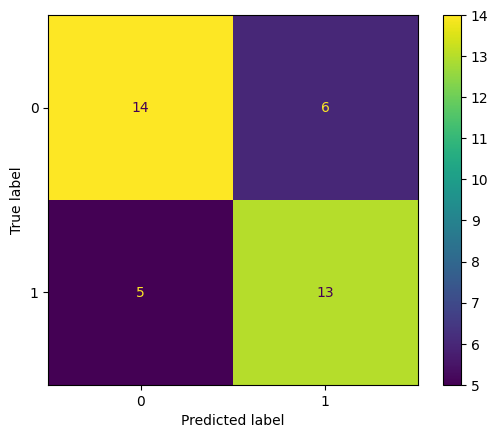

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

y_test_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


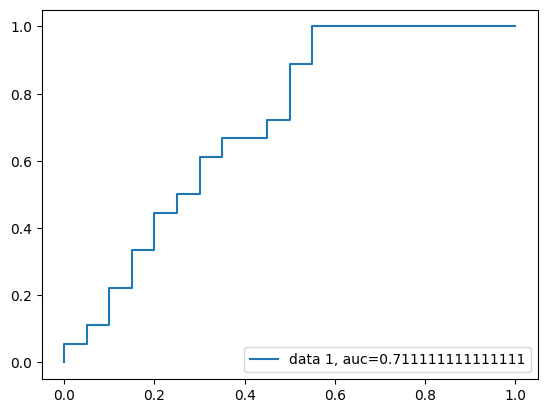

In [30]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression # Import LogisticRegression
import matplotlib.pyplot as plt
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba,pos_label='5')
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()



In [31]:
data

,0,1,2,3,4,5,6,7,8,9,...,237,238,239,240,241,242,243,244,245,246
0,34.16,72.431249,69.386059,62.775437,69.193931,69.447900,69.042085,57.324333,41.658465,55.851042,...,38.430096,35.788543,30.735163,23.983279,90.007737,61.732586,34.488338,60.451504,70.739249,54.527141
1,42.35,19.579138,19.703305,23.000027,31.034078,22.461115,23.616729,50.770251,14.458573,13.843582,...,49.485011,23.732740,33.724609,27.969158,87.062096,30.399197,30.791722,54.314055,66.564799,74.223444
2,35.16,17.916294,22.911557,19.951421,16.835759,16.792161,16.887329,27.237218,10.324034,16.298826,...,52.508768,25.747939,27.530892,32.955334,87.682934,55.401664,30.018486,70.140061,77.835010,65.376514
3,25.65,20.081892,17.928614,15.977752,18.119963,17.029861,13.545934,11.612536,13.578299,13.790407,...,56.309107,56.225569,41.630283,24.025209,64.517145,32.306905,24.547343,20.224813,37.939512,37.704976
4,18.89,18.429434,26.156602,15.751990,21.654509,26.128217,26.002065,16.649180,7.972443,24.789548,...,16.370765,46.114228,37.495538,28.181369,56.839523,30.254396,50.824793,32.780671,68.284415,24.109788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,44.90,15.704347,16.697437,15.609133,16.450880,19.833692,25.798242,13.372038,11.700532,17.204138,...,59.260004,37.715146,21.153962,22.154970,86.512955,54.549637,32.275086,65.337559,72.986397,63.600655
184,29.59,22.942606,23.842689,25.716234,15.901378,15.949877,16.086458,16.482881,7.448875,10.545153,...,44.903771,37.446261,46.467199,41.173906,79.408928,37.731037,26.032668,54.019381,56.178095,55.277054
185,25.66,19.464531,33.772200,8.422497,14.893522,16.884854,17.626839,14.167356,4.387425,13.252666,...,40.193490,34.204611,18.778983,17.038629,51.976652,38.977493,27.836247,51.581351,52.056675,58.533249
186,26.14,25.079005,17.295701,18.689557,15.510216,14.614339,15.382783,26.571840,9.464767,14.181352,...,31.261314,31.277501,11.529940,14.324497,72.212274,41.629134,8.440981,56.820057,48.688251,44.801352


## Random Forest Feature Selection for EEG w/ age and sex


**Note:**
The first column of data contains sex(1 - female ; 2 - male), the second column constains age, the third column contains speicfic_disorder(4 - Healthy control; 5 - Behavioral addiction disorder), and all the other columns are eeg channels

       0          1          2          3          4          5          6    \
0    34.16  72.431249  69.386059  62.775437  69.193931  69.447900  69.042085   
1    42.35  19.579138  19.703305  23.000027  31.034078  22.461115  23.616729   
2    35.16  17.916294  22.911557  19.951421  16.835759  16.792161  16.887329   
3    25.65  20.081892  17.928614  15.977752  18.119963  17.029861  13.545934   
4    18.89  18.429434  26.156602  15.751990  21.654509  26.128217  26.002065   
..     ...        ...        ...        ...        ...        ...        ...   
183  44.90  15.704347  16.697437  15.609133  16.450880  19.833692  25.798242   
184  29.59  22.942606  23.842689  25.716234  15.901378  15.949877  16.086458   
185  25.66  19.464531  33.772200   8.422497  14.893522  16.884854  17.626839   
186  26.14  25.079005  17.295701  18.689557  15.510216  14.614339  15.382783   
187  29.97  21.344131  16.080218  16.432277  15.770074  16.764789  16.712189   

           7          8          9    .

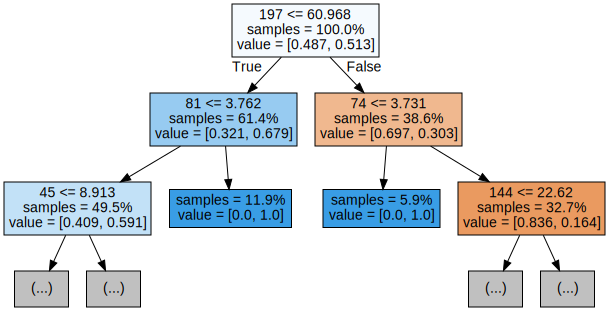

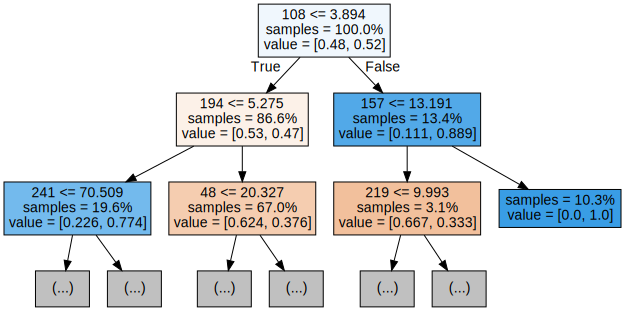

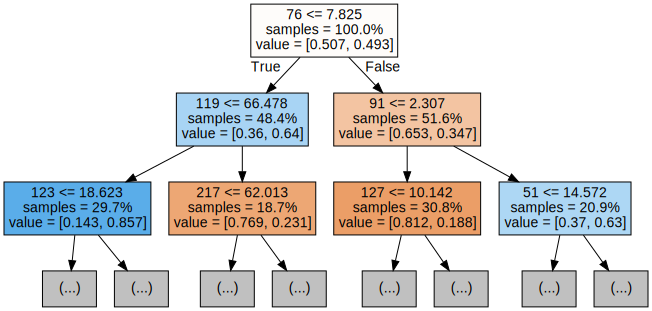

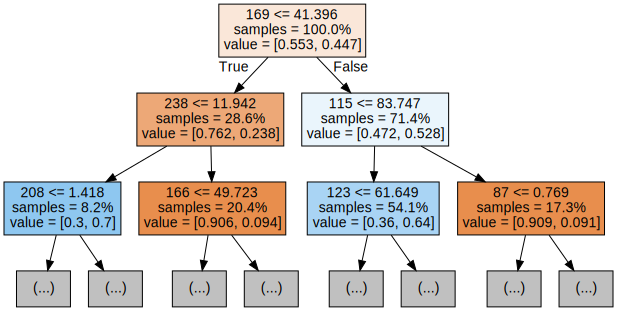

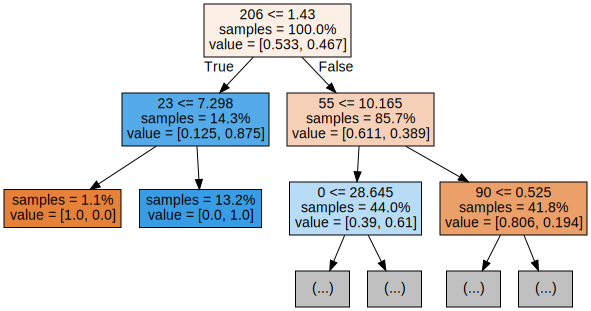

In [32]:
!pip install graphviz
# Install the necessary library
import graphviz
from sklearn.tree import export_graphviz
from io import StringIO  # Replacing six's StringIO
from IPython.display import Image
import pydotplus

rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Drop rows with missing values
#X_train_clean = X_train.dropna()
#y_train_clean = y_train[X_train_clean.index]

# Train the random forest on the cleaned dataset
rf.fit(X_train, y_train)

print(data)
# Export and display the first three trees
for i in range(5):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names = data.columns.tolist(),
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)



## Feature Selection Visualization



https://mljar.com/blog/feature-importance-in-random-forest/

In [33]:
# Load your CSV data
!pip install mne
import mne
import pandas as pd



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 41.6 MB/s eta 0:00:00


In [34]:
!pip install shap
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import shap
from matplotlib import pyplot as plt

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [35]:
data1 = pd.read_csv('/content/numericBehaviorWithAgeOnly.csv')

X = pd.DataFrame(data1.values, columns=data1.columns)
y = data1['specific_disorder']
X = data1.drop(['specific_disorder'], axis=1)
print(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)


       age  AB.A.delta.a.FP1  AB.A.delta.b.FP2  AB.A.delta.c.F7  \
0    34.16         72.431249         69.386059        62.775437   
1    42.35         19.579138         19.703305        23.000027   
2    35.16         17.916294         22.911557        19.951421   
3    25.65         20.081892         17.928614        15.977752   
4    18.89         18.429434         26.156602        15.751990   
..     ...               ...               ...              ...   
183  44.90         15.704347         16.697437        15.609133   
184  29.59         22.942606         23.842689        25.716234   
185  25.66         19.464531         33.772200         8.422497   
186  26.14         25.079005         17.295701        18.689557   
187  29.97         21.344131         16.080218        16.432277   

     AB.A.delta.d.F3  AB.A.delta.e.Fz  AB.A.delta.f.F4  AB.A.delta.g.F8  \
0          69.193931        69.447900        69.042085        57.324333   
1          31.034078        22.461115        

In [36]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

In [37]:
rf.feature_importances_

feature_index = X_train.columns.get_loc('COH.A.delta.f.F4.k.C4')

# Access the feature importance using the numerical index
feature_importance = rf.feature_importances_[feature_index]

# Print the feature importance
print(feature_importance)


0.08009440969340512


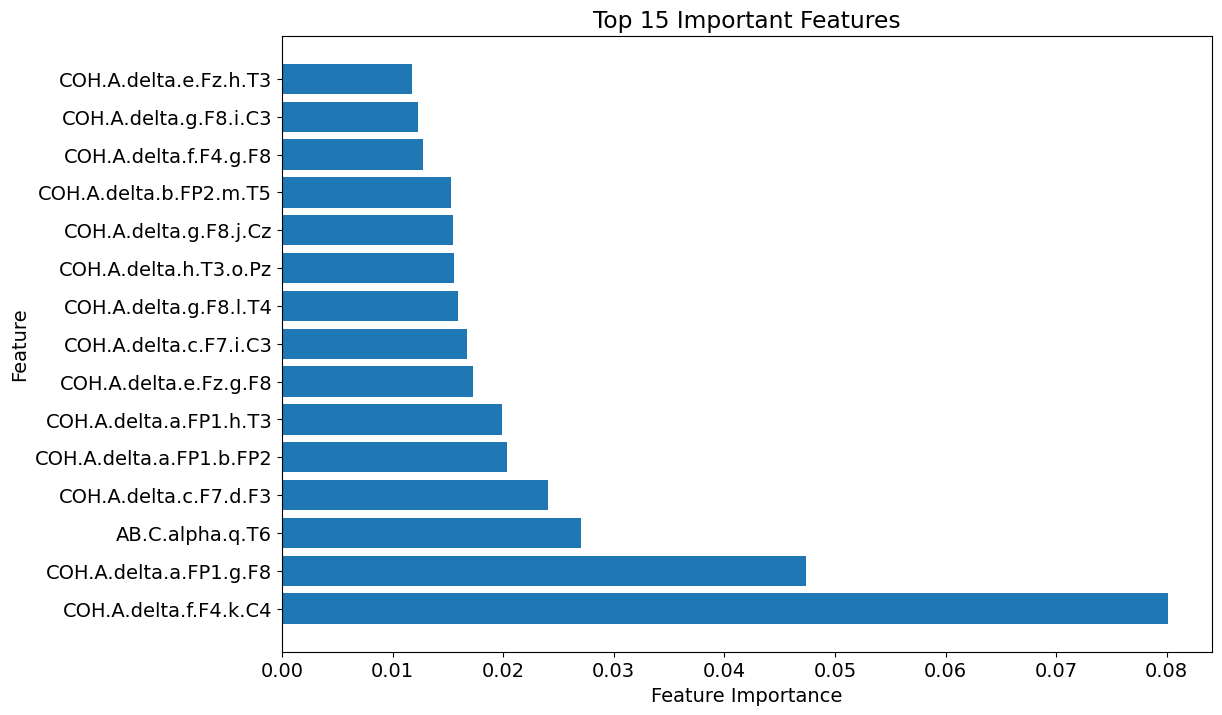

In [38]:
importances = rf.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Select the top 15 features
top_15_features = feature_importance_df.head(15)

# Plot the top 15 features
plt.barh(top_15_features['feature'], top_15_features['importance'])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Top 15 Important Features")
plt.show()

In [39]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

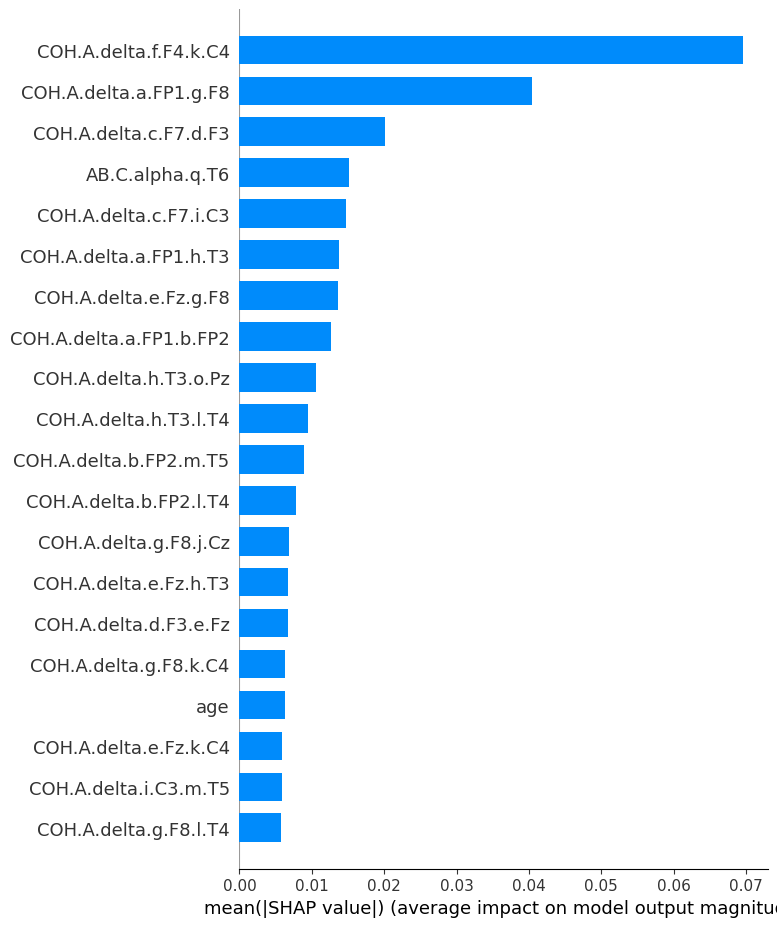

In [40]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

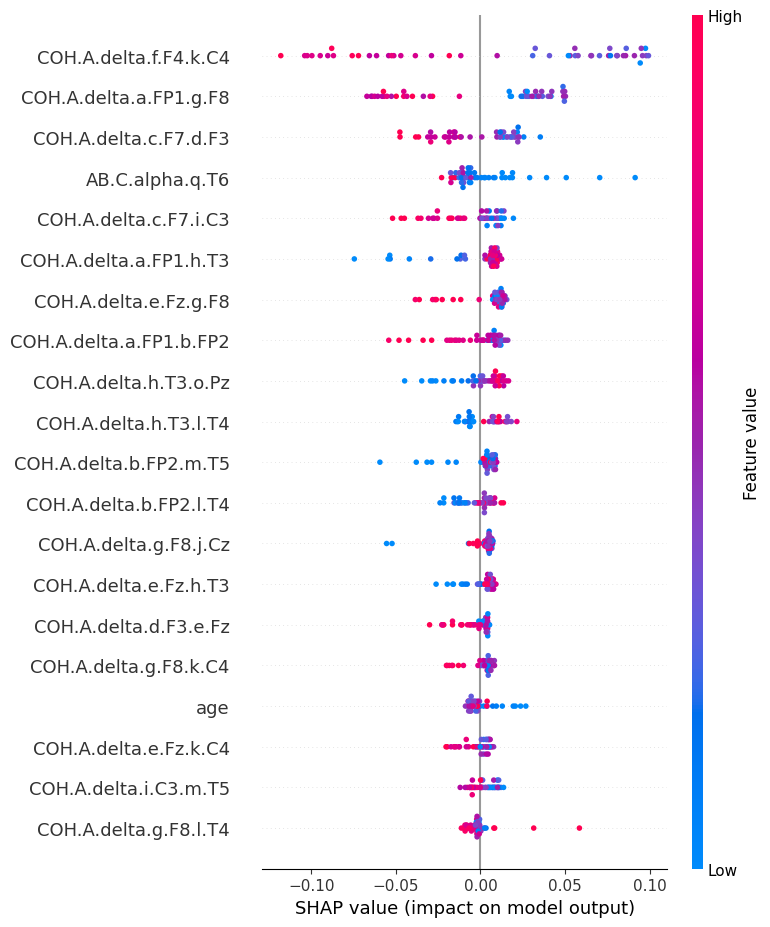

[[-5.46430510e-03 -2.00755278e-03 -3.92622455e-04 ...  4.37116967e-04
  -7.60061774e-05  3.45826122e-04]
 [-1.65652271e-03 -1.49566022e-03 -4.02505411e-04 ... -3.79584228e-04
   1.29470502e-05  1.49175533e-03]
 [-5.69227753e-04 -5.38238177e-03 -4.02505411e-04 ... -3.79584228e-04
   1.29470502e-05  4.55214134e-03]
 ...
 [-3.60947594e-03  1.18322564e-03 -8.70897876e-04 ... -3.55578883e-04
  -5.73913453e-05 -3.37756845e-04]
 [ 1.94091673e-02 -7.37606426e-03 -2.62453951e-04 ...  5.94131844e-04
  -4.59961568e-04 -3.22259403e-04]
 [ 2.37429171e-02 -2.11927230e-03 -3.31313938e-04 ...  1.90689269e-04
  -7.65099131e-05 -6.31461904e-04]]


In [41]:
shap.summary_plot(shap_values, X_test)
print(shap_values)


## Spectra Map


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mne
from math import ceil

In [43]:
chs = {'FP1': [-0.03, 0.08],
       'FP2': [0.03, 0.08],
       'F7': [-0.073, 0.047],
       'F3': [-0.04, 0.041],
       'Fz': [0, 0.038],
       'F4': [0.04, 0.041],
       'F8': [0.073, 0.047],
       'T3': [-0.085, 0],
       'C3': [-0.045, 0],
       'Cz': [0, 0],
       'C4': [0.045, 0],
       'T4': [0.085, 0],
       'T5': [-0.073, -0.047],
       'P3': [-0.04, -0.041],
       'Pz': [0, -0.038],
       'P4': [0.04, -0.041],
       'T6': [0.07, -0.047],
       'O1': [-0.03, -0.08],
       'O2': [0.03, -0.08]}
channels = pd.DataFrame(chs).transpose()
channels

,0,1
FP1,-0.030,0.080
FP2,0.030,0.080
F7,-0.073,0.047
F3,-0.040,0.041
Fz,0.000,0.038
F4,0.040,0.041
F8,0.073,0.047
T3,-0.085,0.000
C3,-0.045,0.000
Cz,0.000,0.000


In [44]:
for key in chs.keys():
    chs[key]+=[0]
chs

{'FP1': [-0.03, 0.08, 0],
 'FP2': [0.03, 0.08, 0],
 'F7': [-0.073, 0.047, 0],
 'F3': [-0.04, 0.041, 0],
 'Fz': [0, 0.038, 0],
 'F4': [0.04, 0.041, 0],
 'F8': [0.073, 0.047, 0],
 'T3': [-0.085, 0, 0],
 'C3': [-0.045, 0, 0],
 'Cz': [0, 0, 0],
 'C4': [0.045, 0, 0],
 'T4': [0.085, 0, 0],
 'T5': [-0.073, -0.047, 0],
 'P3': [-0.04, -0.041, 0],
 'Pz': [0, -0.038, 0],
 'P4': [0.04, -0.041, 0],
 'T6': [0.07, -0.047, 0],
 'O1': [-0.03, -0.08, 0],
 'O2': [0.03, -0.08, 0]}

<ipython-input-45-dd49041d41c7>:2: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  mont.plot()


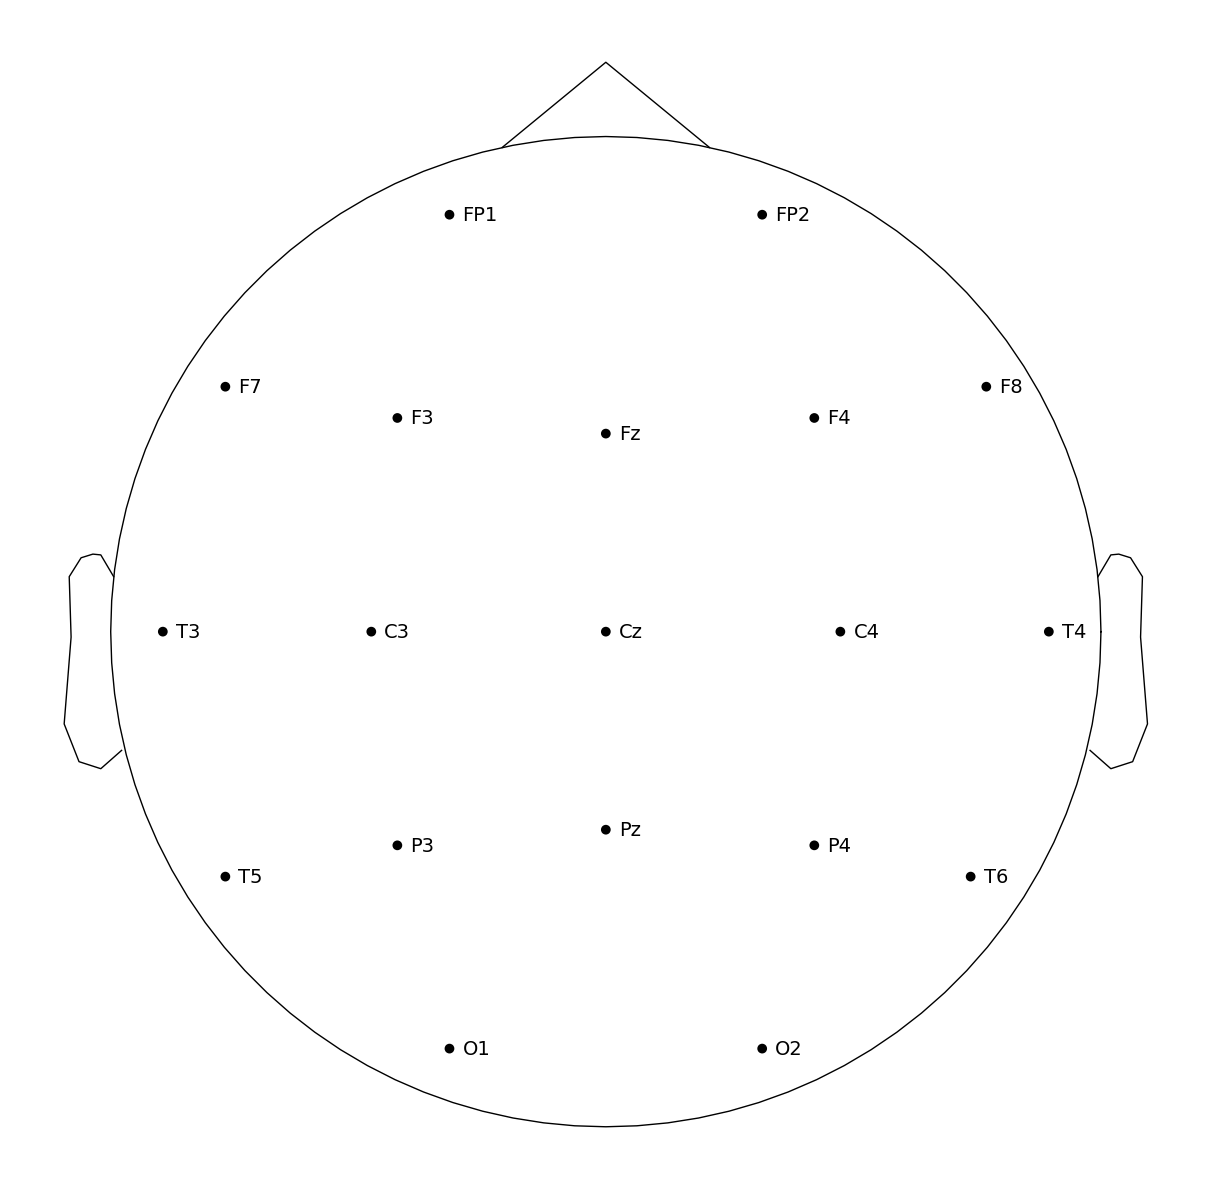

In [45]:
mont = mne.channels.make_dig_montage(chs)
mont.plot()
plt.show()

In [46]:
def plot_eeg(levels, positions, axes, fig, ch_names=None, cmap='Spectral_r', cb_pos=(0.9, 0.1),
             cb_width=0.04, cb_height=0.9, marker=None, marker_style=None, vmin=None, vmax=None, **kwargs):
    """
    Function visulises processed EEG data in a simple way. Based on mne.viz.plot_topomap.


    :param levels: numpy.array, shape (n_chan,)
        data values to plot.
    :param positions: numpy.array, shape (n_chan, 2)|instance of mne.Info
        Location information for the data points(/channels). If an array, for each data point,
        the x and y coordinates. If an Info object, it must contain only one data type and exactly
        len(data) data channels, and the x/y coordinates will be inferred from the montage applied
        to the Info object.
    :param axes: matplotlib.axes.Axes
        The axes to plot to.
    :param fig: matplotlib.figure.Figure
        The figure to create colorbar on.
    :param ch_names: list | None
        List of channel names. If None, channel names are not plotted.
    :param cmap: matplotlib colormap | None
        Colormap to use. If None, ‘Reds’ is used for all positive data, otherwise defaults to ‘RdBu_r’.
        Default value is 'Spectral_r'
    :param cb_pos: tuple/list of floats
        Coordinates of color bar
    :param cb_width: float
        Width of colorbar
    :param cb_height: float
        Height of colorbar
    :param marker: numpy.array of bool, shape (n_channels,) | None
        Array indicating channel(s) to highlight with a distinct plotting style.
        Array elements set to True will be plotted with the parameters given in mask_params.
        Defaults to None, equivalent to an array of all False elements.
    :param marker_style: dict | None
        Additional plotting parameters for plotting significant sensors. Default (None) equals:
        dict(marker='o', markerfacecolor='w', markeredgecolor='k', linewidth=0, markersize=4)
    :param vmin, vmax: float | callable() | None
        Lower and upper bounds of the colormap, in the same units as the data.
        If vmin and vmax are both None, they are set at ± the maximum absolute value
        of the data (yielding a colormap with midpoint at 0). If only one of vmin, vmax is None,
        will use min(data) or max(data), respectively. If callable, should accept a NumPy array
        of data and return a float.
    :param kwargs:
        any other parameter used in mne.viz.plot_topomap
    :return im: matplotlib.image.AxesImage
        The interpolated data.
    :return cn: matplotlib.contour.ContourSet
        The fieldlines.
    """
    if 'mask' not in kwargs:
        mask = np.ones(levels.shape[0], dtype='bool')
    else:
        mask = None
    im, cm = mne.viz.plot_topomap(levels, positions, axes=axes, names=ch_names, vmin=vmin, vmax=vmax,
                          cmap=cmap, mask=mask, mask_params=marker_style, show=False, **kwargs)

    cbar_ax = fig.add_axes([cb_pos[0], cb_pos[1], cb_width, cb_height])
    clb = axes.figure.colorbar(im, cax=cbar_ax)
    return im, cm

In [48]:
df = pd.read_csv('/content/EEG.machinelearing_data_BRMH 2.csv')
df

,no.,sex,age,eeg.date,education,IQ,main.disorder,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,1,M,57.00,2012.8.30,NaN,NaN,Addictive disorder,Alcohol use disorder,35.998557,21.717375,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,2,M,37.00,2012.9.6,6.0,120.0,Addictive disorder,Alcohol use disorder,13.425118,11.002916,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,3,M,32.00,2012.9.10,16.0,113.0,Addictive disorder,Alcohol use disorder,29.941780,27.544684,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,4,M,35.00,2012.10.8,18.0,126.0,Addictive disorder,Alcohol use disorder,21.496226,21.846832,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,5,M,36.00,2012.10.18,16.0,112.0,Addictive disorder,Alcohol use disorder,37.775667,33.607679,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,654,M,28.29,2017.6.19,13.0,108.0,Mood disorder,Depressive disorder,25.483437,26.971285,...,77.478244,39.948726,32.538177,47.525104,67.235395,24.338273,53.972143,20.539052,53.781315,47.087771
654,655,M,19.88,2017.7.11,13.0,63.0,Mood disorder,Depressive disorder,29.642496,28.419546,...,79.920523,47.744440,56.711814,57.109377,73.714098,38.449343,69.309401,25.377354,79.527573,42.424228
655,656,F,47.84,2017.7.17,12.0,93.0,Mood disorder,Depressive disorder,59.302431,73.998810,...,87.413415,64.690859,49.151533,72.893275,77.657835,40.614611,74.885047,29.650632,67.071852,53.071650
656,657,M,36.21,2017.8.21,16.0,93.0,Trauma and stress related disorder,Posttraumatic stress disorder,34.052944,38.767643,...,67.020536,49.121421,46.840203,49.256592,70.981269,54.331367,65.979867,43.366516,59.321302,51.526134


In [49]:
# One of the columns contains no data, it separates data
# patient info | abs power of PSD per band per channel | sep_col | functional connectivity data
mis = df.isna().sum()
sep_col = mis[mis == df.shape[0]].index[0]
df = df.loc[:, 'main.disorder':sep_col].drop(sep_col, axis=1)
df

,main.disorder,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,AB.A.delta.g.F8,AB.A.delta.h.T3,...,AB.F.gamma.j.Cz,AB.F.gamma.k.C4,AB.F.gamma.l.T4,AB.F.gamma.m.T5,AB.F.gamma.n.P3,AB.F.gamma.o.Pz,AB.F.gamma.p.P4,AB.F.gamma.q.T6,AB.F.gamma.r.O1,AB.F.gamma.s.O2
0,Addictive disorder,Alcohol use disorder,35.998557,21.717375,21.518280,26.825048,26.611516,25.732649,16.563408,29.891368,...,1.993727,1.765493,1.464281,1.501948,1.707307,1.553448,1.552658,1.388662,1.592717,1.806598
1,Addictive disorder,Alcohol use disorder,13.425118,11.002916,11.942516,15.272216,14.151570,12.456034,8.436832,9.975238,...,0.903383,0.931967,0.437117,0.930843,1.234874,1.373268,1.411808,1.140695,1.118041,3.162143
2,Addictive disorder,Alcohol use disorder,29.941780,27.544684,17.150159,23.608960,27.087811,13.541237,16.523963,12.775574,...,1.096713,1.691152,1.505663,1.133891,1.661768,1.403429,1.349457,1.270525,1.408471,1.454618
3,Addictive disorder,Alcohol use disorder,21.496226,21.846832,17.364316,13.833701,14.100954,13.100939,14.613650,8.063191,...,1.115040,1.122776,2.128138,1.648217,1.147666,1.049152,1.131654,1.415856,1.391048,1.527403
4,Addictive disorder,Alcohol use disorder,37.775667,33.607679,21.865556,21.771413,22.854536,21.456377,15.969042,9.434306,...,1.193191,2.320845,3.562820,1.441662,1.018804,1.274009,2.350806,2.307730,2.129431,3.766860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,Mood disorder,Depressive disorder,25.483437,26.971285,35.581333,34.785765,30.606672,35.883132,25.475066,20.943024,...,1.960685,2.119841,3.754245,1.777989,2.300397,2.055716,2.049891,1.910333,2.501384,4.285844
654,Mood disorder,Depressive disorder,29.642496,28.419546,17.259390,14.423154,17.000424,17.679369,19.552558,8.571076,...,1.205032,1.122101,1.116647,0.848676,1.292835,0.941390,0.883414,0.869869,0.855726,0.939398
655,Mood disorder,Depressive disorder,59.302431,73.998810,55.186133,62.616810,62.387671,59.402787,56.825057,39.554532,...,3.558113,3.550954,3.793332,2.908677,3.581211,4.438099,4.382289,5.397113,5.553098,15.962316
656,Trauma and stress related disorder,Posttraumatic stress disorder,34.052944,38.767643,23.033481,27.883287,30.598038,30.507718,28.283886,18.021624,...,1.329568,1.373374,1.478663,1.405171,1.385755,1.290009,1.354197,1.325898,3.883033,2.123719


In [50]:
def reformat_name(name):
    '''
    reformat from XX.X.band.x.channel to band.channel
    '''
    band, _, channel = name[5:].split(sep='.')
    return f'{band}.{channel}'
reformat_vect = np.vectorize(reformat_name)
new_colnames = np.concatenate((df.columns[:2],
                              reformat_vect(df.columns[2:])))
df.set_axis(new_colnames, axis=1, inplace=True)
df.columns

TypeError: DataFrame.set_axis() got an unexpected keyword argument 'inplace'

## Regression

COH.A.delta.f.F4.k.C4
Accuracy: 0.5789473684210527


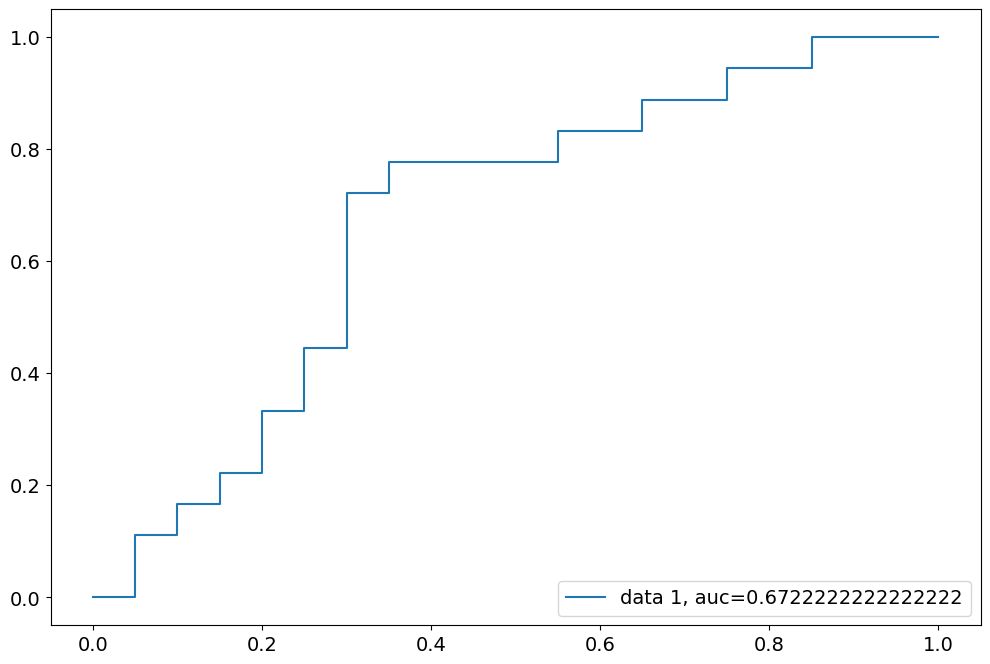

COH.A.delta.a.FP1.g.F8
Accuracy: 0.631578947368421


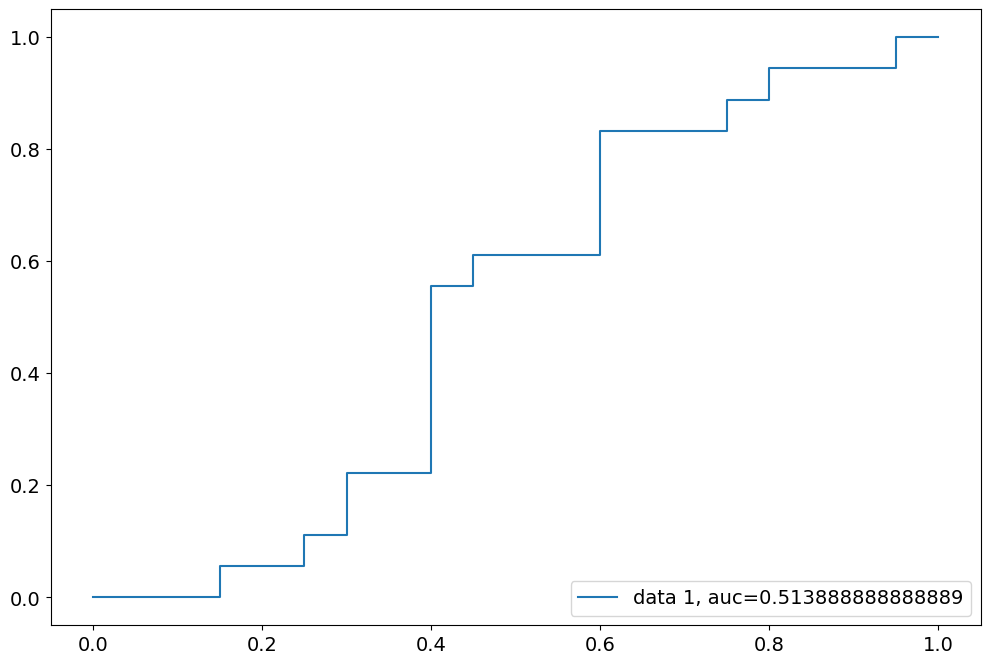

AB.C.alpha.q.T6
Accuracy: 0.47368421052631576


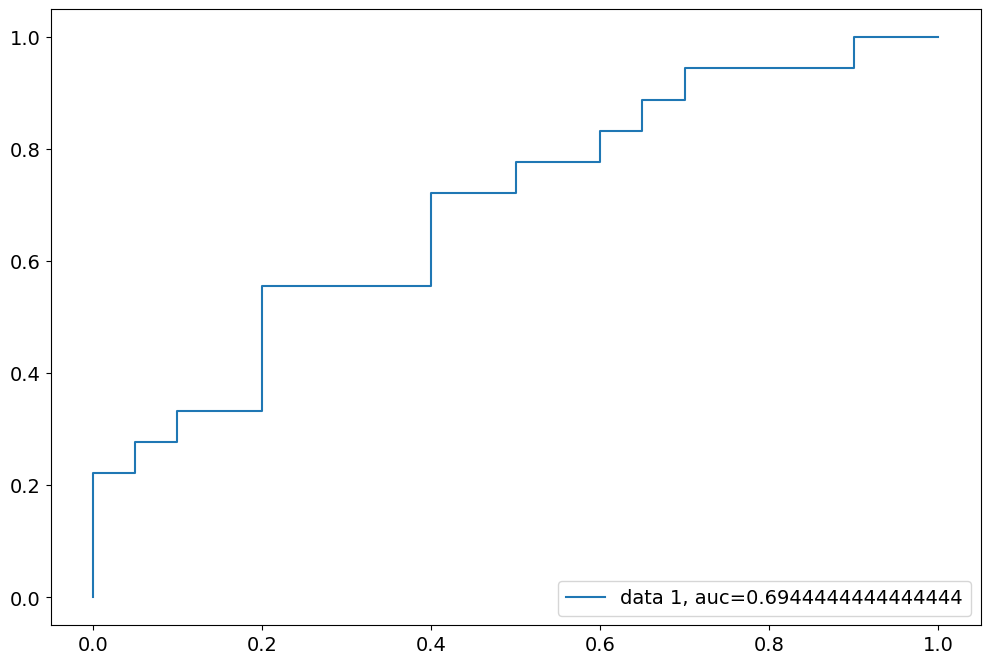

COH.A.delta.c.F7.d.F3
Accuracy: 0.5


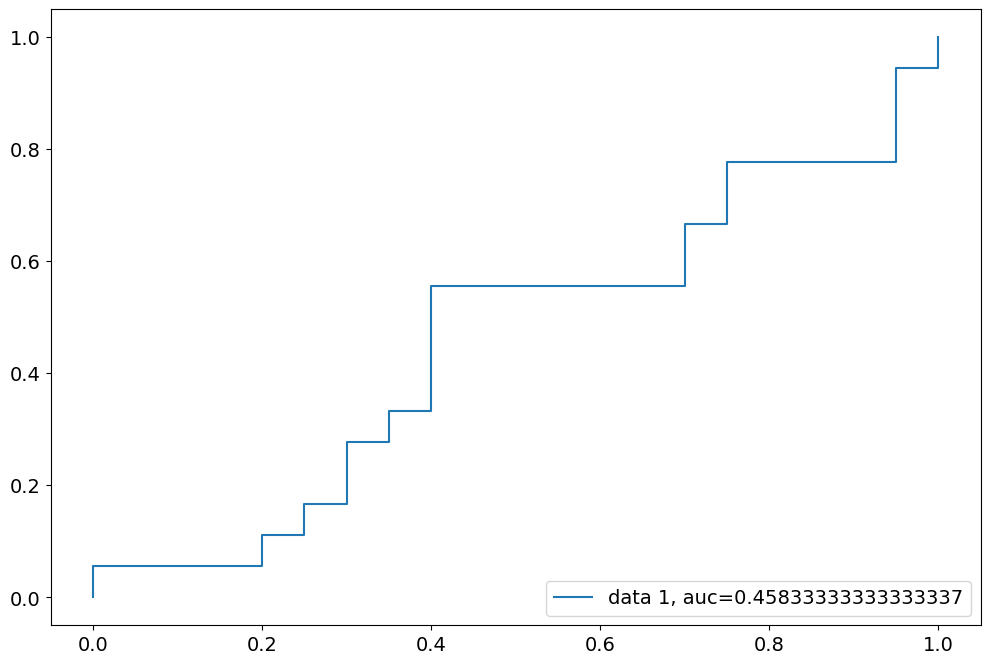

COH.A.delta.a.FP1.b.FP2
Accuracy: 0.5


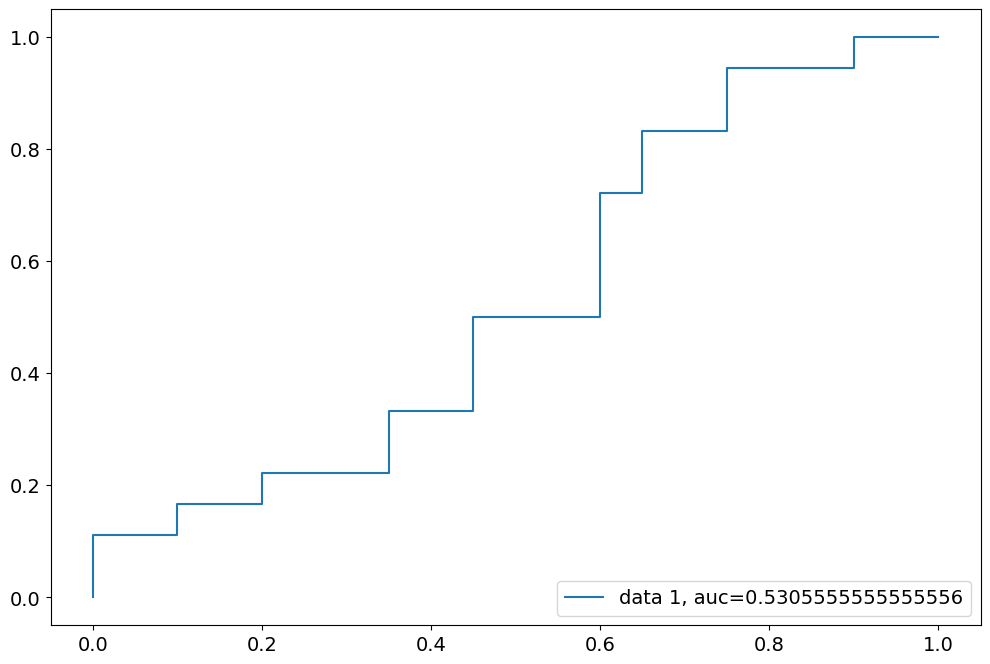

COH.A.delta.a.FP1.h.T3
Accuracy: 0.5263157894736842


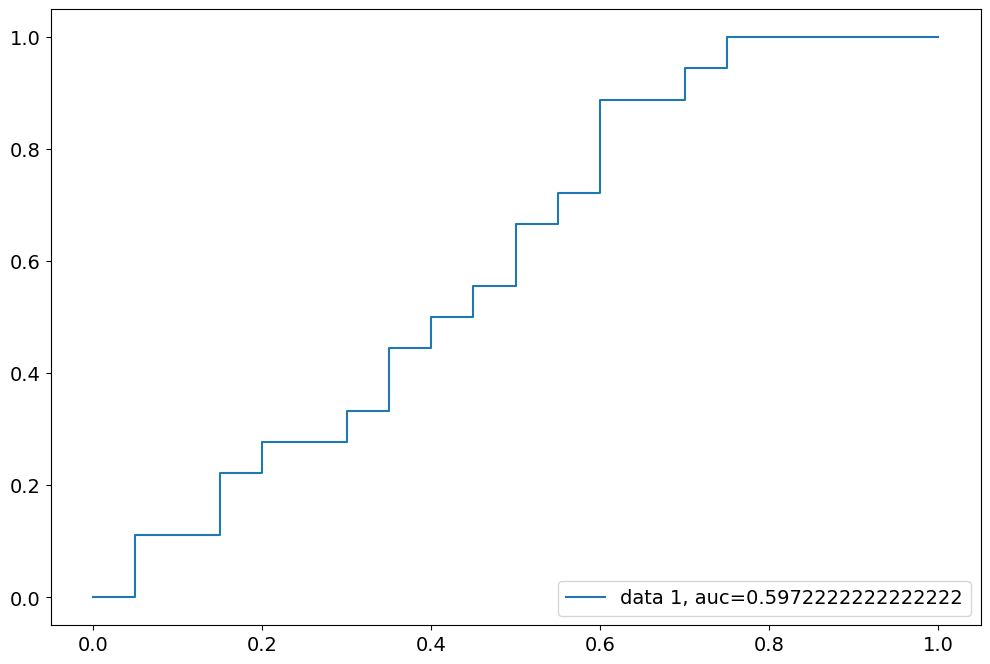

COH.A.delta.e.Fz.g.F8
Accuracy: 0.6052631578947368


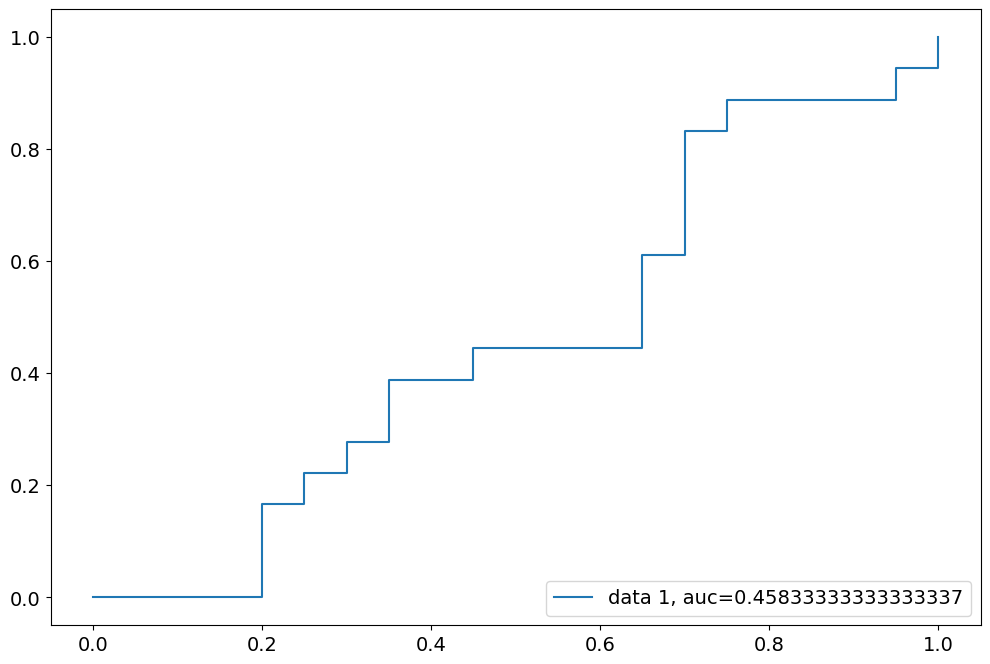

COH.A.delta.c.F7.i.C3
Accuracy: 0.47368421052631576


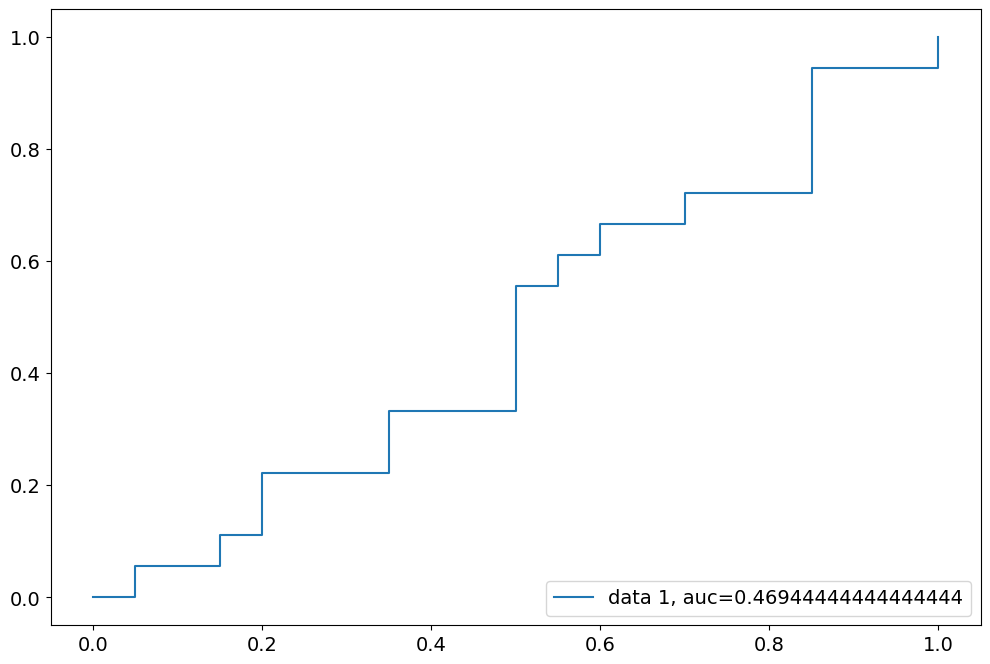

COH.A.delta.g.F8.l.T4
Accuracy: 0.5526315789473685


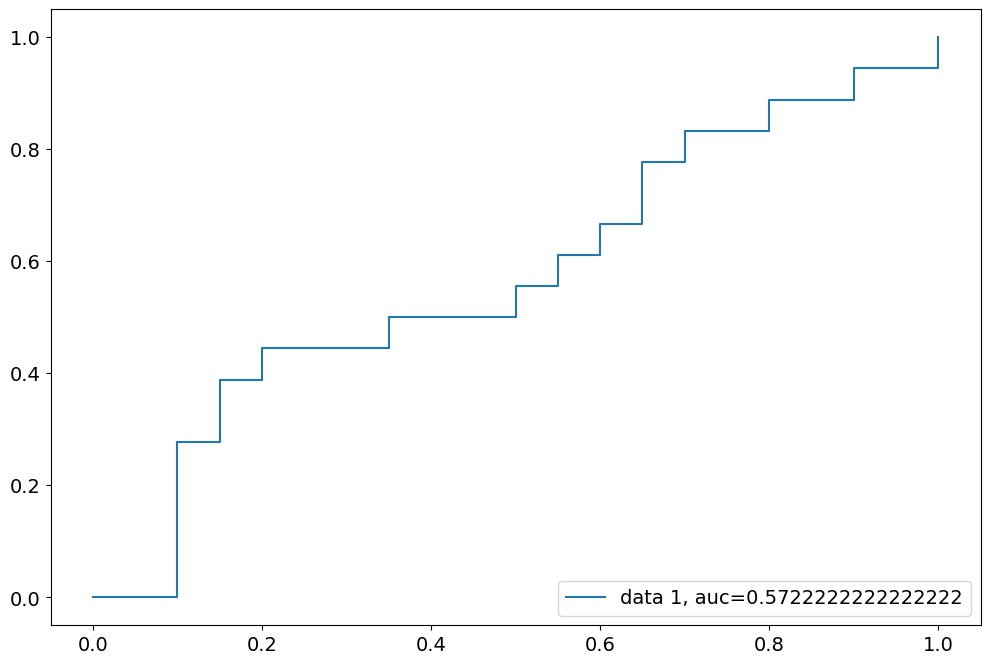

COH.A.delta.h.T3.o.Pz
Accuracy: 0.47368421052631576


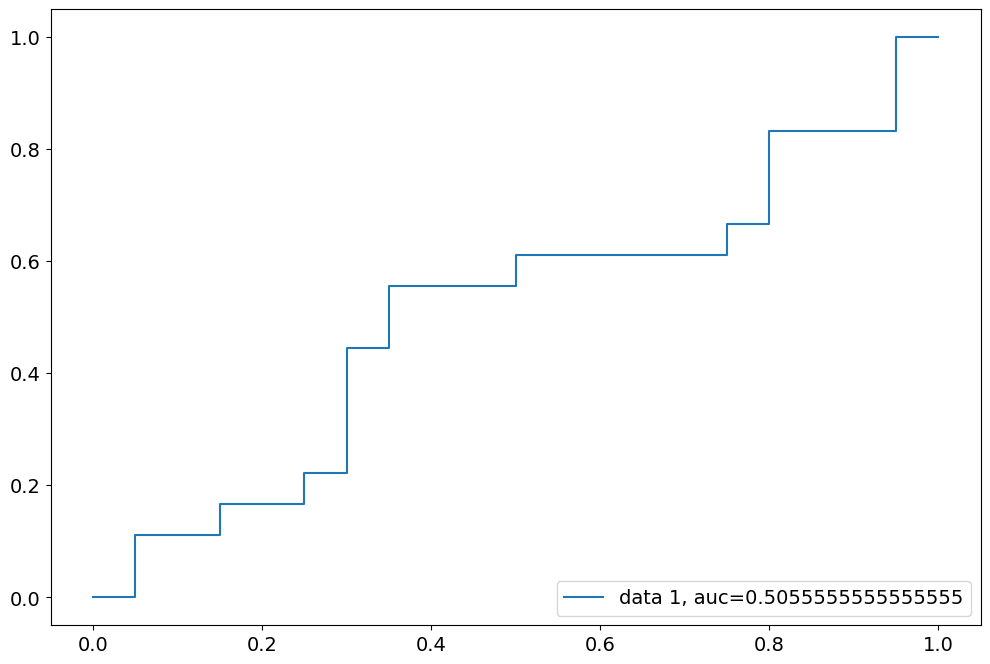

COH.A.delta.g.F8.j.Cz
Accuracy: 0.5263157894736842


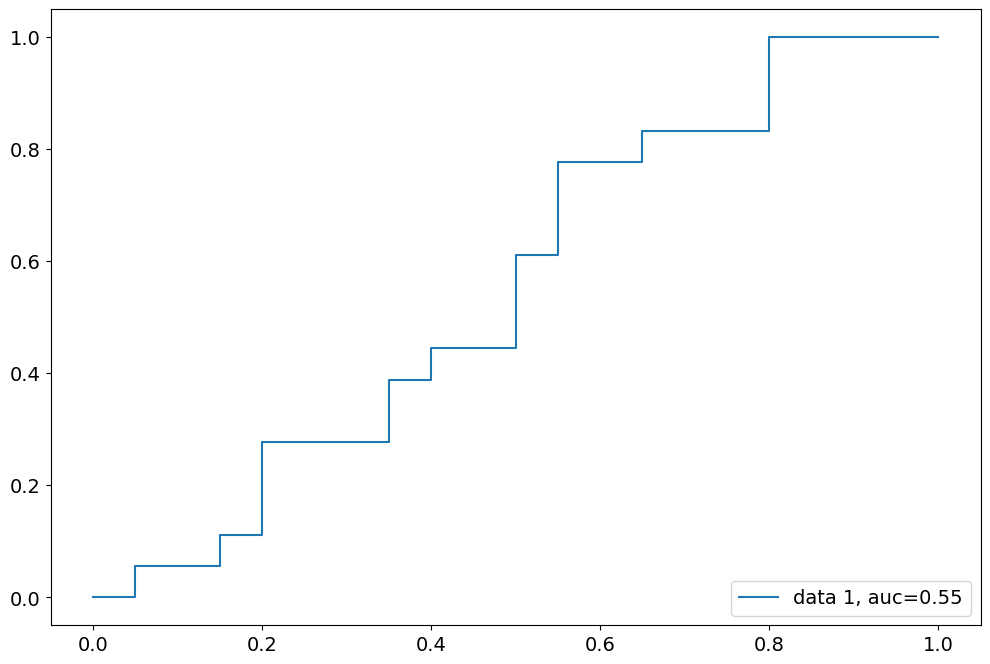

COH.A.delta.b.FP2.m.T5
Accuracy: 0.6578947368421053


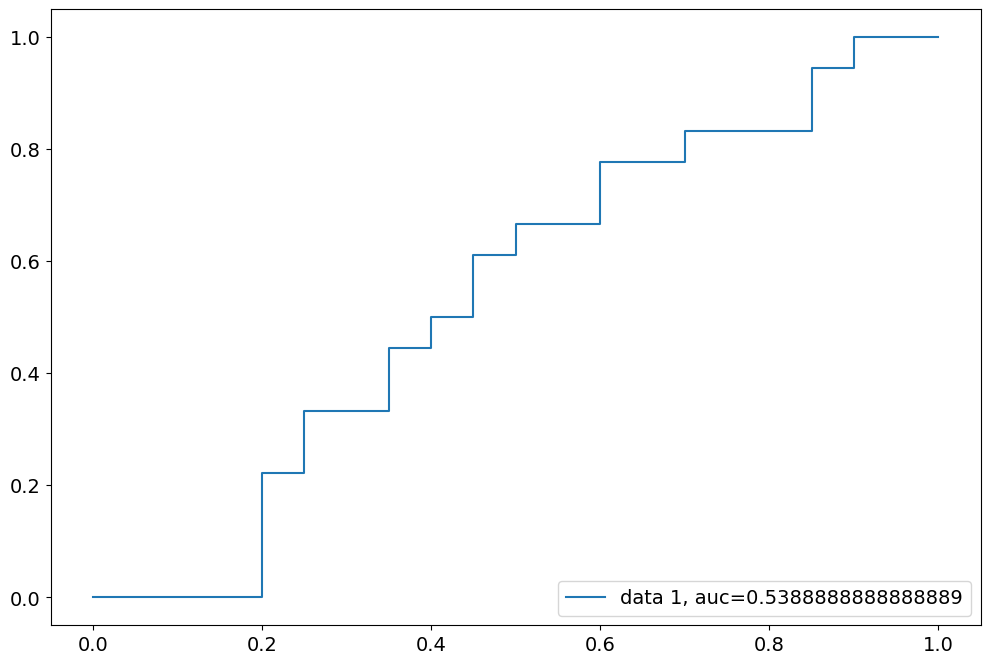

COH.A.delta.f.F4.g.F8
Accuracy: 0.5789473684210527


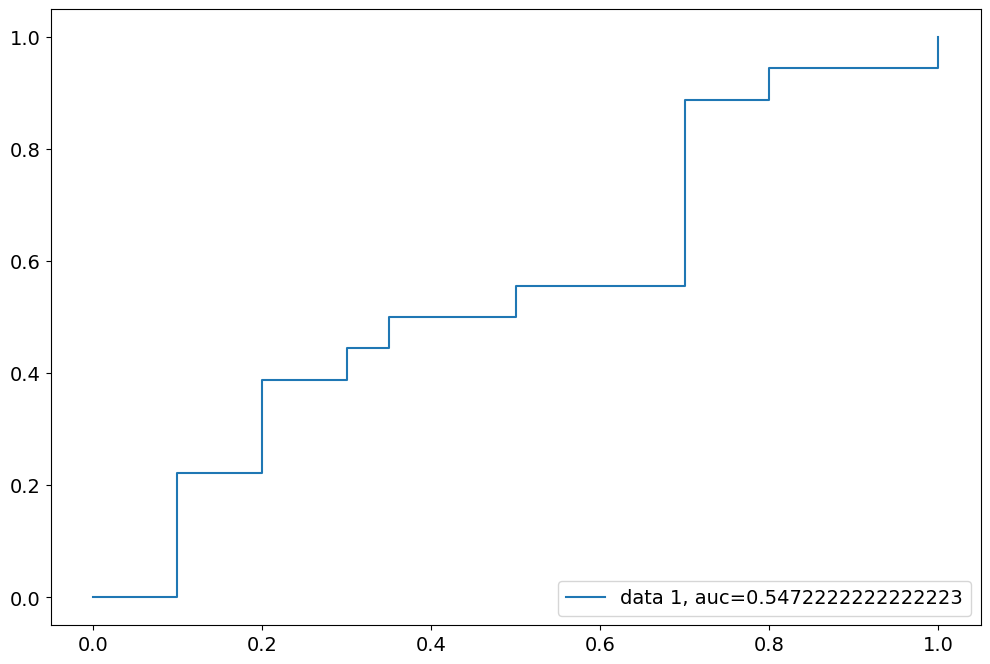

COH.A.delta.g.F8.i.C3
Accuracy: 0.5263157894736842


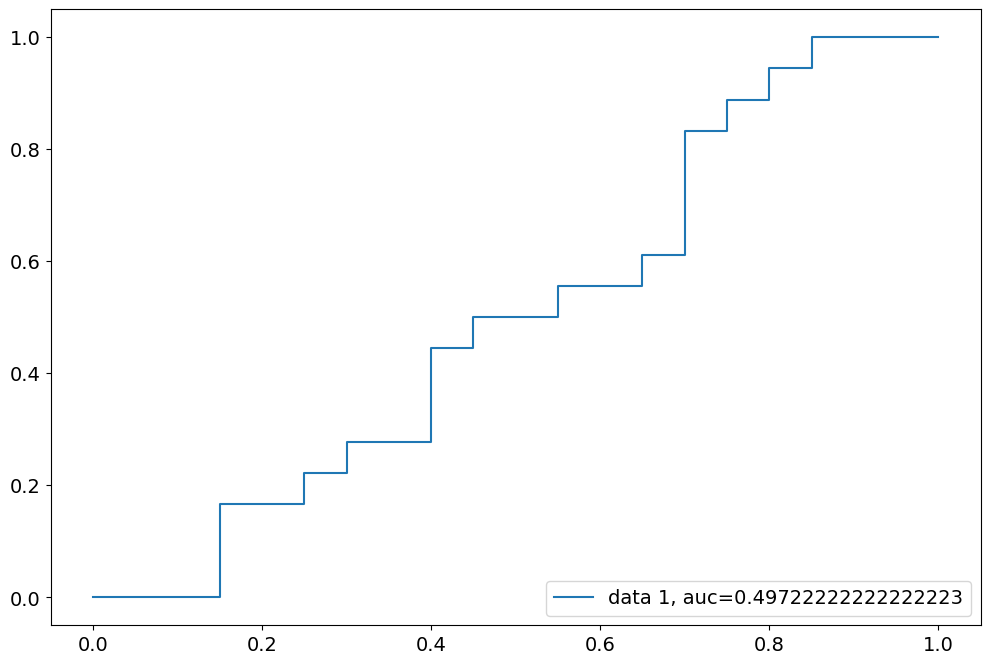

COH.A.delta.e.Fz.h.T3
Accuracy: 0.42105263157894735


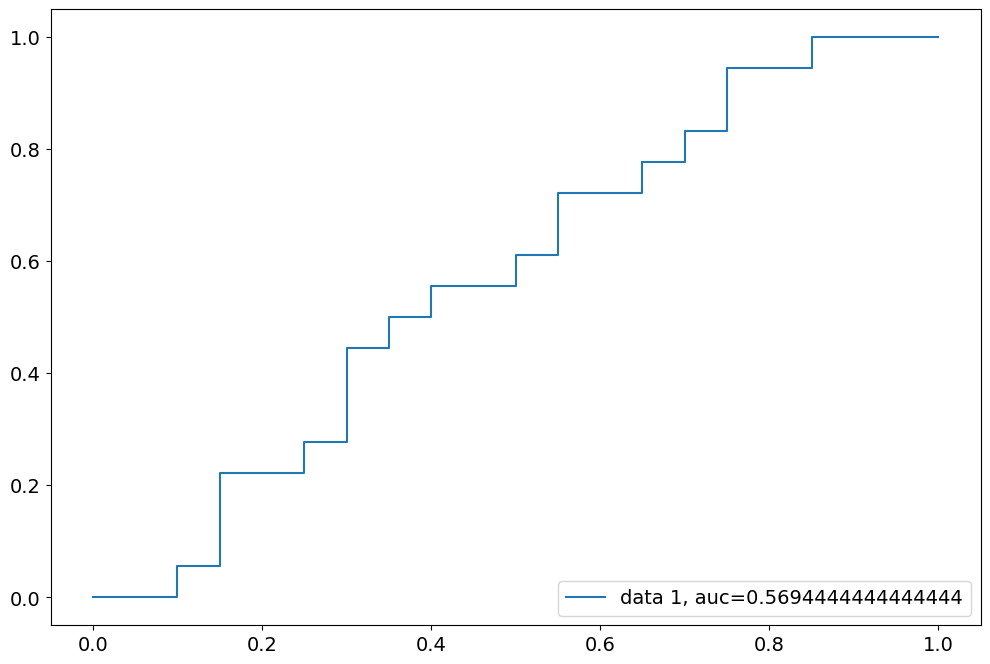

In [52]:
import random
random.seed(15)
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression # Import LogisticRegression
import matplotlib.pyplot as plt
from sklearn import metrics
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier



# Assuming 'top_15_features' is a DataFrame with columns 'feature' and 'importance'
# Iterate over the values in the 'feature' column
for feature in top_15_features['feature']:  # Access the 'feature' column
  print(feature)
  data1 = pd.read_csv('/content/numericBehaviorWithAgeOnly.csv')
  Y = data1['specific_disorder']
  # Use the current feature for X
  X = data1[[feature]]

  Y=Y.astype('str')
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

  from sklearn.tree import DecisionTreeClassifier
  clf = DecisionTreeClassifier(class_weight='balanced')
  clf.fit(X, y)
  # Create Decision Tree classifer object
  clf = DecisionTreeClassifier()

  # Train Decision Tree Classifer
  clf = clf.fit(X_train,y_train)


  # Calculate accuracy for the test set (assuming `y_test` and `X_test` are defined)
  y_test_pred = clf.predict(X_test)

  print("Accuracy:", metrics.accuracy_score(y_test, y_test_pred))

  logreg = LogisticRegression()
  #logreg.fit(X_train, y_train)
  logreg.fit(X, Y)

  y_pred_proba = logreg.predict_proba(X_test)[::,1]
  fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba,pos_label='5')
  auc = metrics.roc_auc_score(y_test, y_pred_proba)
  plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
  plt.legend(loc=4)
  plt.show()

COH.A.delta.f.F4.k.C4
Accuracy: 0.5789473684210527
COH.A.delta.a.FP1.g.F8
Accuracy: 0.631578947368421
AB.C.alpha.q.T6
Accuracy: 0.47368421052631576
COH.A.delta.c.F7.d.F3
Accuracy: 0.5
COH.A.delta.a.FP1.b.FP2
Accuracy: 0.5
COH.A.delta.a.FP1.h.T3
Accuracy: 0.5263157894736842
COH.A.delta.e.Fz.g.F8
Accuracy: 0.6052631578947368
COH.A.delta.c.F7.i.C3
Accuracy: 0.47368421052631576
COH.A.delta.g.F8.l.T4
Accuracy: 0.5526315789473685
COH.A.delta.h.T3.o.Pz
Accuracy: 0.47368421052631576
COH.A.delta.g.F8.j.Cz
Accuracy: 0.5263157894736842
COH.A.delta.b.FP2.m.T5
Accuracy: 0.6578947368421053
COH.A.delta.f.F4.g.F8
Accuracy: 0.5789473684210527
COH.A.delta.g.F8.i.C3
Accuracy: 0.5263157894736842
COH.A.delta.e.Fz.h.T3
Accuracy: 0.42105263157894735


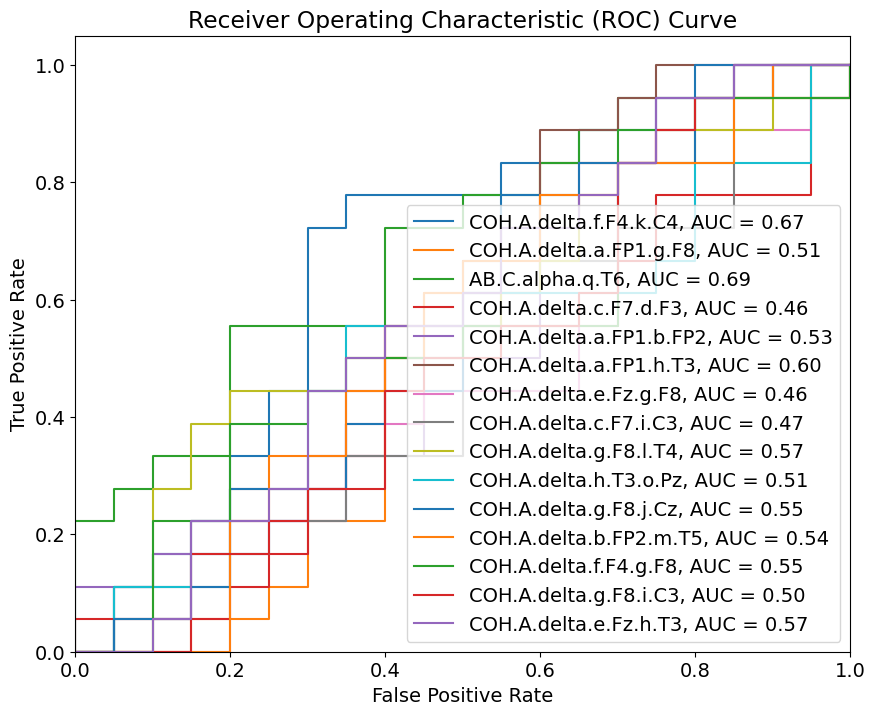

In [53]:
import random
random.seed(15)
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn import metrics
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

fprs = []
tprs = []
aucs = []

for feature in top_15_features['feature']:
    print(feature)
    data1 = pd.read_csv('/content/numericBehaviorWithAgeOnly.csv')
    Y = data1['specific_disorder']
    X = data1[[feature]]

    Y = Y.astype('str')
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

    clf = DecisionTreeClassifier()

    clf.fit(X_train, y_train)

    y_test_pred = clf.predict(X_test)
    print("Accuracy:", metrics.accuracy_score(y_test, y_test_pred))

    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)

    y_pred_proba = logreg.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba, pos_label='5')
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    fprs.append(fpr)
    tprs.append(tpr)
    aucs.append(auc)

plt.figure(figsize=(10, 8))
for i, feature in enumerate(top_15_features['feature']):
    plt.plot(fprs[i], tprs[i], label=f"{feature}, AUC = {aucs[i]:.2f}")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [54]:
data1 = pd.read_csv('/content/numericBehaviorWithAgeOnly.csv')
Y = data1['specific_disorder']
X = data1[['COH.A.delta.f.F4.k.C4']]
#'COH.A.delta.a.FP1.g.F8', 'COH.A.delta.c.F7.d.F3', 'sex', 'age', 'COH.A.delta.c.F7.i.C3'
print(X)


     COH.A.delta.f.F4.k.C4
0                76.639834
1                68.864418
2                79.477142
3                78.541404
4                37.628818
..                     ...
183              66.991806
184              72.191418
185              51.064942
186              65.202604
187              60.873129

[188 rows x 1 columns]


In [55]:
Y=Y.astype('str')
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 1)
(38, 1)
(150,)
(38,)


In [56]:
import random
random.seed(15)
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)


# Calculate accuracy for the test set (assuming `y_test` and `X_test` are defined)
y_test_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_test_pred))

Accuracy: 0.5789473684210527


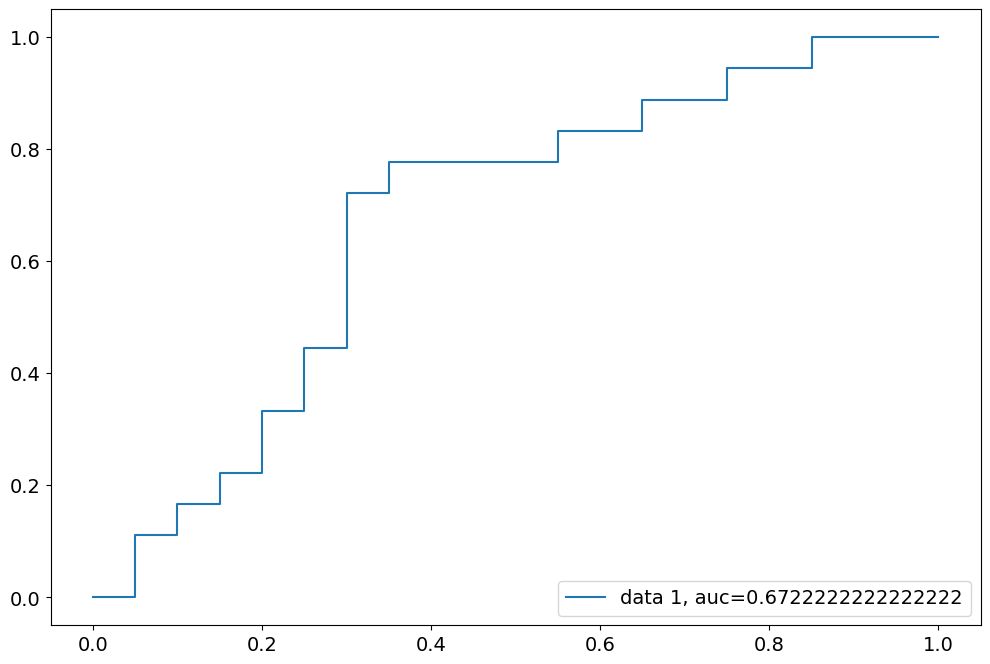

In [57]:

from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression # Import LogisticRegression
import matplotlib.pyplot as plt
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba,pos_label='5')
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [58]:
X = top_15_features['feature'].tolist()
X=data1[X]

import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
print(X)
print(len(X))


X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

     COH.A.delta.f.F4.k.C4  COH.A.delta.a.FP1.g.F8  AB.C.alpha.q.T6  \
0                76.639834               51.937391        76.256849   
1                68.864418               31.445739         8.411437   
2                79.477142               52.457034        13.432912   
3                78.541404               69.483540         7.399344   
4                37.628818               61.467298        19.442971   
..                     ...                     ...              ...   
183              66.991806               43.218549         8.037181   
184              72.191418               27.234749         2.904588   
185              51.064942               35.464644         4.069226   
186              65.202604               48.327899        11.084057   
187              60.873129               63.159951         3.460022   

     COH.A.delta.c.F7.d.F3  COH.A.delta.a.FP1.b.FP2  COH.A.delta.a.FP1.h.T3  \
0                72.617697                40.893243               43

In [59]:
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np

channel_num = 0
data1 = pd.read_csv('/content/numericBehaviorWithAgeOnly.csv')
Y = data1['specific_disorder']

# Convert 'specific_disorder' to binary (0 or 1)
# Assuming values other than 4 represent 0 and 4 represents 1
data1['specific_disorder'] = data1['specific_disorder'].apply(lambda x: 1 if x == 4 else 0)

for i in top_15_features['feature']:
    print("channel " + i)
    data1.rename(columns={i: f'channel_{channel_num}'}, inplace=True)
    print(data1[f'channel_{channel_num}'])

    X = data1[[f'channel_{channel_num}']]
    formula_str = f"specific_disorder ~ channel_{channel_num}"
    print(formula_str)

    log_reg = smf.logit(formula_str, data=data1).fit()
    print(log_reg.summary())

    odds_ratios = pd.DataFrame(
        {
            "OR": log_reg.params,
            "Lower CI": log_reg.conf_int()[0],
            "Upper CI": log_reg.conf_int()[1],
        }
    )
    odds_ratios = np.exp(odds_ratios)
    print(odds_ratios)
    print('''

    _______________________________________________________________________________________________________



    ''')

    channel_num += 1


channel COH.A.delta.f.F4.k.C4
0      76.639834
1      68.864418
2      79.477142
3      78.541404
4      37.628818
         ...    
183    66.991806
184    72.191418
185    51.064942
186    65.202604
187    60.873129
Name: channel_0, Length: 188, dtype: float64
specific_disorder ~ channel_0
Optimization terminated successfully.
         Current function value: 0.676365
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:      specific_disorder   No. Observations:                  188
Model:                          Logit   Df Residuals:                      186
Method:                           MLE   Df Model:                            1
Date:                Tue, 29 Oct 2024   Pseudo R-squ.:                 0.02413
Time:                        23:03:55   Log-Likelihood:                -127.16
converged:                       True   LL-Null:                       -130.30
Covariance Type:            nonrobust   LLR p-value: 

In [60]:
import statsmodels.api as sm
mod = sm.OLS(Y,X)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']

feature_names = top_15_features['feature'].tolist() # Use the feature column

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame named 'df'
df = pd.DataFrame({'P-value': odds_ratios, 'Variable': feature_names})
lower_bound = odds_ratios - std_err  # Lower bound of confidence interval
upper_bound = odds_ratios + std_err  # Upper bound of confidence interval

# Add confidence intervals to the DataFrame
df['Lower Bound'] = lower_bound
df['Upper Bound'] = upper_bound


sns.barplot(data=df, x='P-value', y='Variable')
plt.axvline(1, linestyle='--', color='gray')  # Add a line at odds ratio = 1
plt.xlabel('P-value')
plt.ylabel('Variable')
plt.title('P-value Plot')
plt.show()


sns.pointplot(data=df, x='P-value', y='Variable', join=True)
plt.axvline(1, linestyle='--', color='gray')  # Add a line at odds ratio = 1
plt.xlabel('P-value')
plt.ylabel('Variable')
plt.title('P-value Plot')
plt.show()

ValueError: Data must be 1-dimensional, got ndarray of shape (2, 3) instead

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Optimization terminated successfully.
         Current function value: 0.586035
         Iterations 6


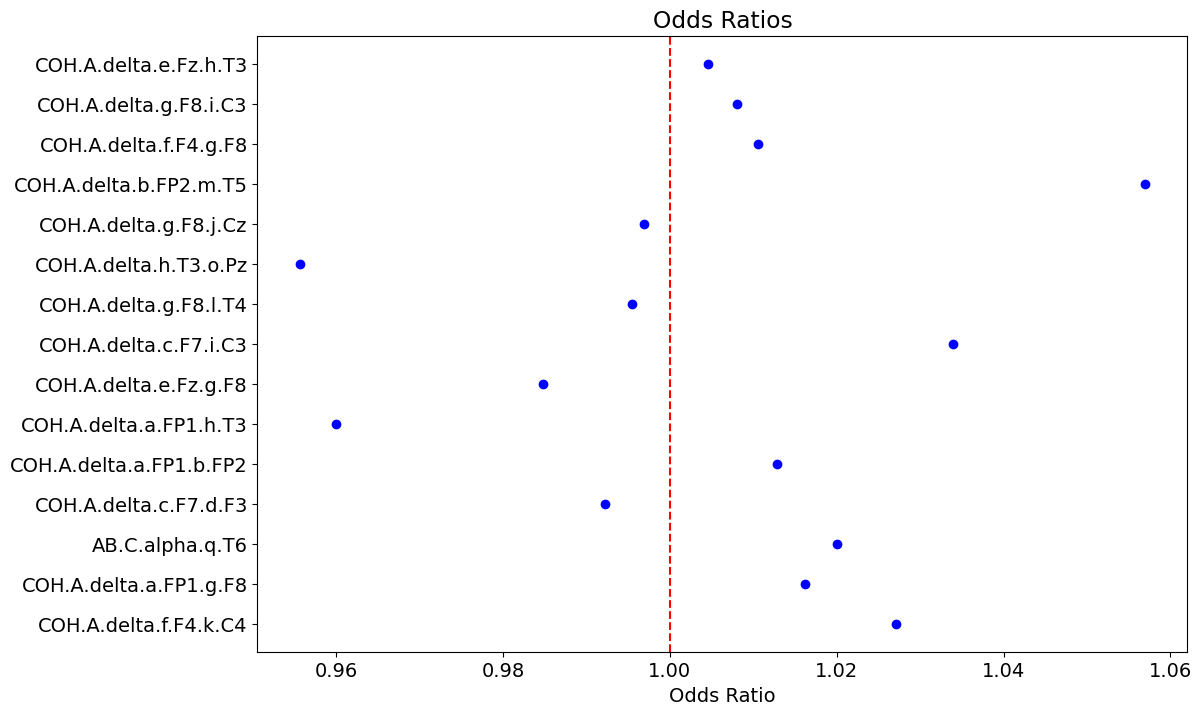

<ipython-input-62-c0fe4b05fc86>:84: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(data=df, x='Odds Ratio', y='Variable', join=False)


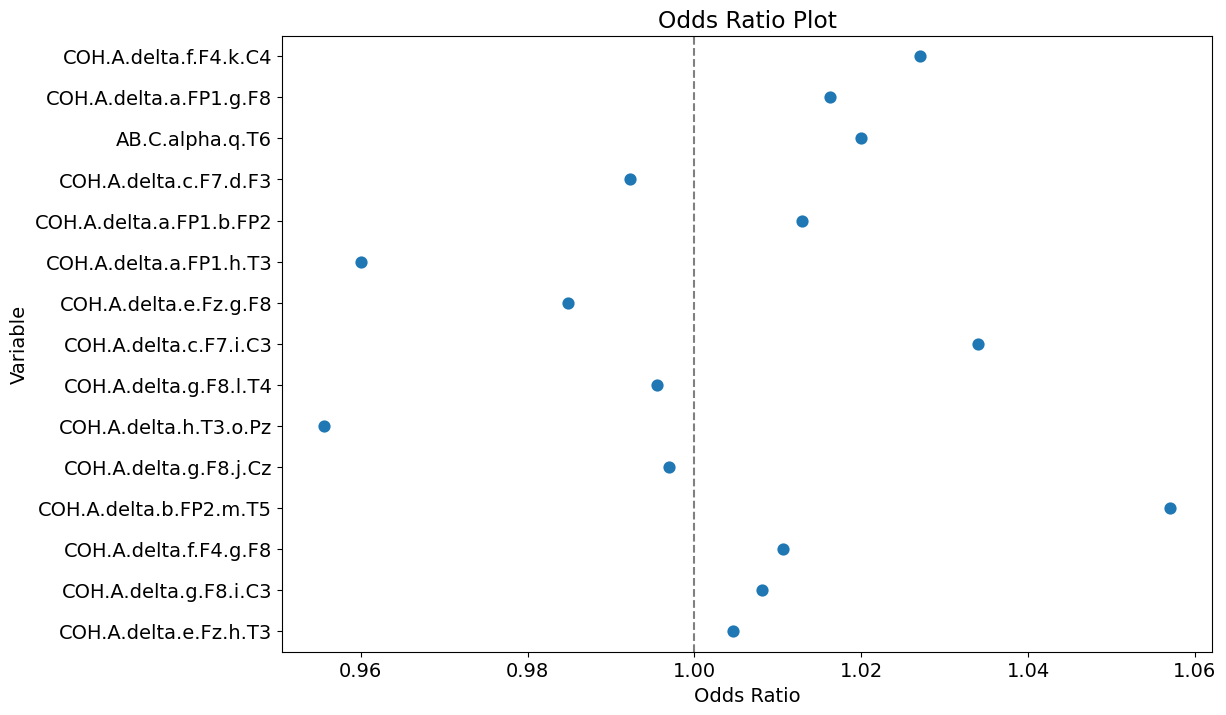

<ErrorbarContainer object of 3 artists>

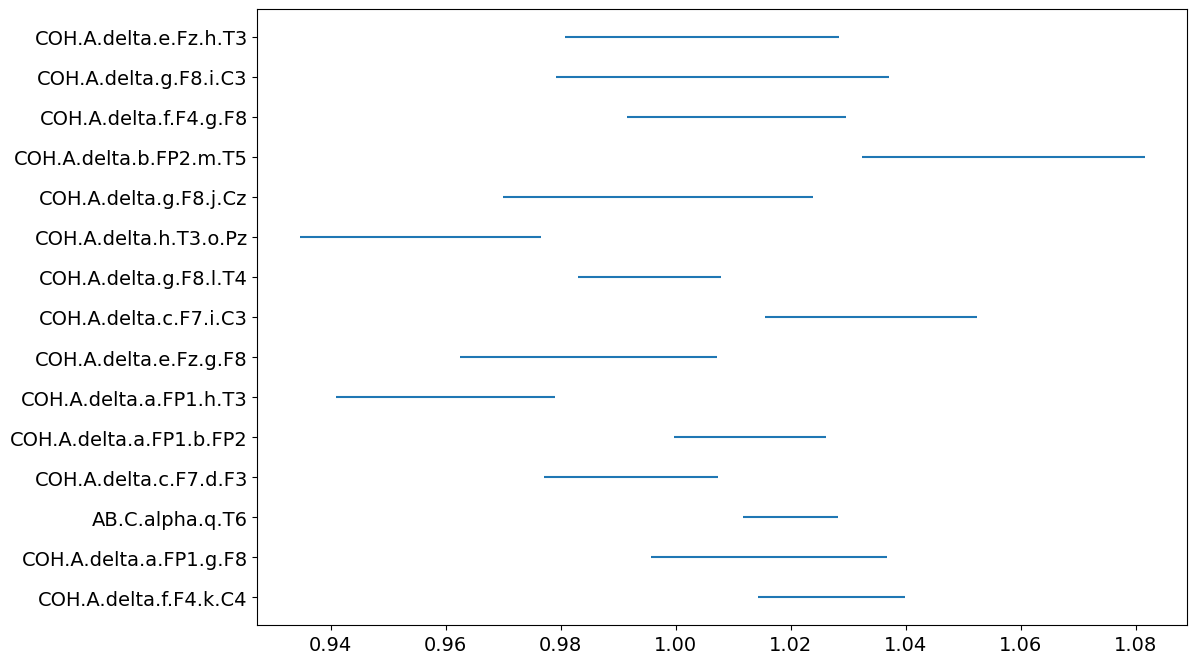

In [62]:
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np

data1 = pd.read_csv('/content/numericBehaviorWithAgeOnly.csv')
Y = data1['specific_disorder']

from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
# Apply imputation only to the columns specified in 'top_15_features'
data2 = imp_mean.fit_transform(data1[top_15_features['feature']]) # Changed this line
data = pd.DataFrame(data2)


import pandas as pd
from sklearn.linear_model import LogisticRegression

# Create your feature matrix (X) and target vector (y)
feature_names = top_15_features['feature'].tolist()
X = pd.DataFrame(data2, columns=feature_names) #X.columns are original col names before imputation

# Convert 'specific_disorder' to binary (0 or 1)
# Assuming values other than 4 represent 0 and 4 represents 1
y = data1['specific_disorder'].apply(lambda x: 1 if x == 4 else 0)

# Fit the logistic regression model
model = LogisticRegression()
model.fit(X, y)

import numpy as np

# Get the coefficients
coefficients = model.coef_[0]

# Calculate odds ratios
odds_ratios = np.exp(coefficients)

# Calculate standard errors (this is the missing part)
# We'll use statsmodels for this as sklearn doesn't directly provide it
import statsmodels.api as sm
X_with_const = sm.add_constant(X)  # Add a constant for the intercept
logit_model = sm.Logit(y, X_with_const)
result = logit_model.fit()
std_err = result.bse.values[1:]  # Get standard errors for the features, excluding intercept


# Create a list of feature names
feature_names = top_15_features['feature'].tolist() # Use the feature column

# Create a figure and axes
fig, ax = plt.subplots()

# Plot the odds ratios and confidence intervals
# len(feature_names) should now match len(odds_ratios)
ax.errorbar(odds_ratios, range(len(feature_names)), xerr=None, fmt='o', color='blue')

# Add labels and a vertical line at 1
ax.set_yticks(range(len(feature_names)))
ax.set_yticklabels(feature_names)
ax.axvline(x=1, color='red', linestyle='--')

# Set the title and labels
ax.set_title('Odds Ratios')
ax.set_xlabel('Odds Ratio')

# Show the plot
plt.show()


import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame named 'df'
df = pd.DataFrame({'Odds Ratio': odds_ratios, 'Variable': feature_names})
lower_bound = odds_ratios - std_err  # Lower bound of confidence interval
upper_bound = odds_ratios + std_err  # Upper bound of confidence interval

# Add confidence intervals to the DataFrame
df['Lower Bound'] = lower_bound
df['Upper Bound'] = upper_bound


sns.pointplot(data=df, x='Odds Ratio', y='Variable', join=False)
plt.axvline(1, linestyle='--', color='gray')  # Add a line at odds ratio = 1
plt.xlabel('Odds Ratio')
plt.ylabel('Variable')
plt.title('Odds Ratio Plot')
plt.show()

plt.errorbar(x=df['Odds Ratio'], y=df['Variable'], xerr=[df['Odds Ratio'] - df['Lower Bound'], df['Upper Bound'] - df['Odds Ratio']], fmt='none')

<ipython-input-63-524272ec6136>:17: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(data=df, x='Odds Ratio', y='Variable', join=False, ax=ax, color='blue', marker='o')


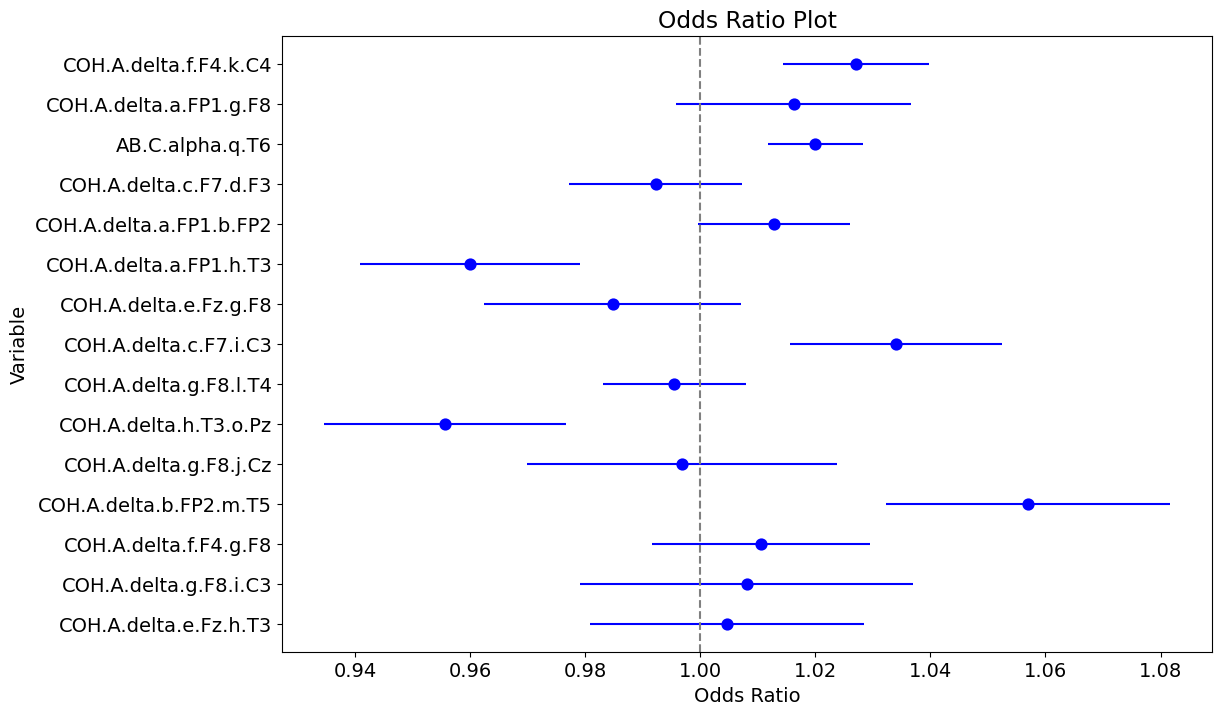

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame named 'df'
df = pd.DataFrame({'Odds Ratio': odds_ratios, 'Variable': feature_names})
lower_bound = odds_ratios - std_err  # Lower bound of confidence interval
upper_bound = odds_ratios + std_err  # Upper bound of confidence interval

# Add confidence intervals to the DataFrame
df['Lower Bound'] = lower_bound
df['Upper Bound'] = upper_bound

# Create the figure and axes
fig, ax = plt.subplots()

# Plot the point estimates (odds ratios)
sns.pointplot(data=df, x='Odds Ratio', y='Variable', join=False, ax=ax, color='blue', marker='o')

# Add error bars using ax.errorbar
ax.errorbar(
    x=df['Odds Ratio'],
    y=df['Variable'],
    xerr=[df['Odds Ratio'] - df['Lower Bound'], df['Upper Bound'] - df['Odds Ratio']],
    fmt='|',
    color='blue'
)

plt.axvline(1, linestyle='--', color='gray')  # Add a line at odds ratio = 1
plt.xlabel('Odds Ratio')
plt.ylabel('Variable')
plt.title('Odds Ratio Plot')
plt.show()


<ipython-input-64-3e5d62501500>:17: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(data=df, x='Odds Ratio', y='Variable', join=False, ax=ax, color='blue', marker='o')


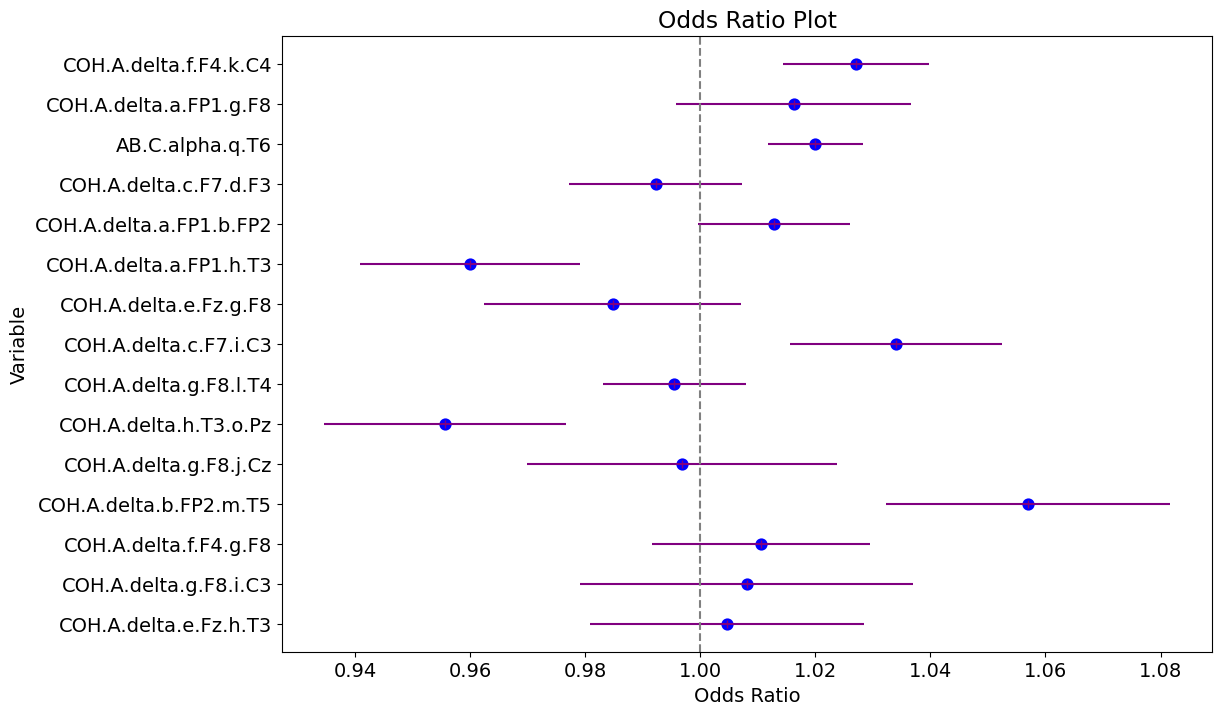

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame named 'df'
df = pd.DataFrame({'Odds Ratio': odds_ratios, 'Variable': feature_names})
lower_bound = odds_ratios - std_err  # Lower bound of confidence interval
upper_bound = odds_ratios + std_err  # Upper bound of confidence interval

# Add confidence intervals to the DataFrame
df['Lower Bound'] = lower_bound
df['Upper Bound'] = upper_bound

# Create the figure and axes
fig, ax = plt.subplots()

# Plot the point estimates (odds ratios)
sns.pointplot(data=df, x='Odds Ratio', y='Variable', join=False, ax=ax, color='blue', marker='o')

# Add error bars using ax.errorbar
ax.errorbar(
    x=df['Odds Ratio'],
    y=df['Variable'],
    xerr=[df['Odds Ratio'] - df['Lower Bound'], df['Upper Bound'] - df['Odds Ratio']],
    fmt='|',
    color='purple'
)

plt.axvline(1, linestyle='--', color='gray')  # Add a line at odds ratio = 1
plt.xlabel('Odds Ratio')
plt.ylabel('Variable')
plt.title('Odds Ratio Plot')
plt.show()

## `Age and Sex without EEG - Specific Disorder Prediction`

The higher prediction value when only using age and sex proves that the first model is taking eeg channels into account

In [65]:
data1 = pd.read_csv('/content/NoEEG - only extras.csv')

In [66]:
Y = data1['specific_disorder']
X = data1.drop(['specific_disorder'], axis=1)

In [67]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
data2 = imp_mean.fit_transform(X)

In [68]:
data = pd.DataFrame(data2)
X=data

Y
data

,0,1
0,1.0,34.16
1,1.0,42.35
2,1.0,35.16
3,1.0,25.65
4,1.0,18.89
...,...,...
183,2.0,44.90
184,2.0,29.59
185,2.0,25.66
186,2.0,26.14


In [69]:
Y=Y.astype('str')
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 2)
(38, 2)
(150,)
(38,)


In [70]:
import random
random.seed(15)
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)


# Calculate accuracy for the test set (assuming `y_test` and `X_test` are defined)
y_test_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_test_pred))

Accuracy: 0.7631578947368421


In [71]:
#prediction after fixing class imbalance

from imblearn.over_sampling import RandomOverSampler
Y=Y.astype('str')
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X, Y = oversampler.fit_resample(data2, Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

random.seed(15)
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

# Calculate accuracy for the test set (assuming `y_test` and `X_test` are defined)
y_test_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_test_pred))

(152, 2)
(38, 2)
(152,)
(38,)
Accuracy: 0.7894736842105263


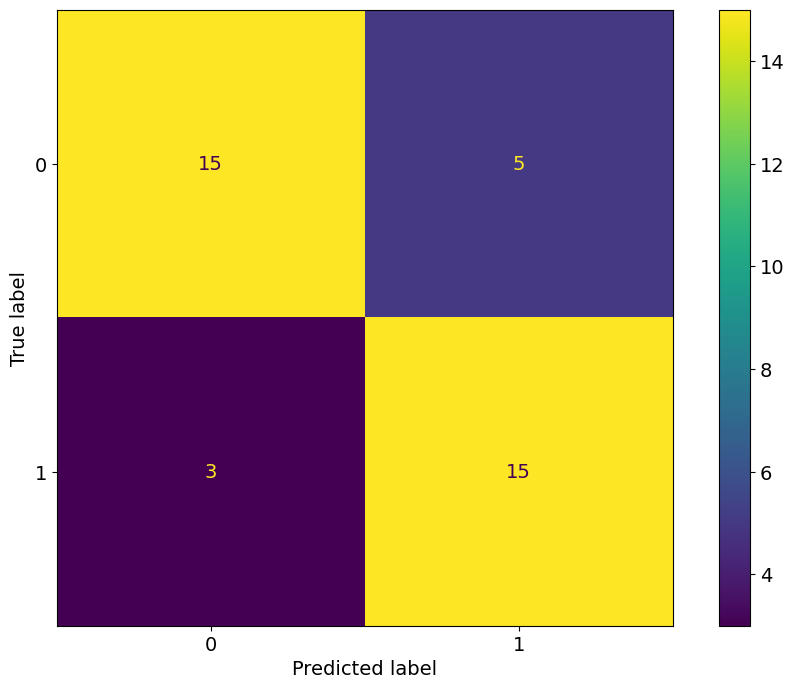

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

y_test_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

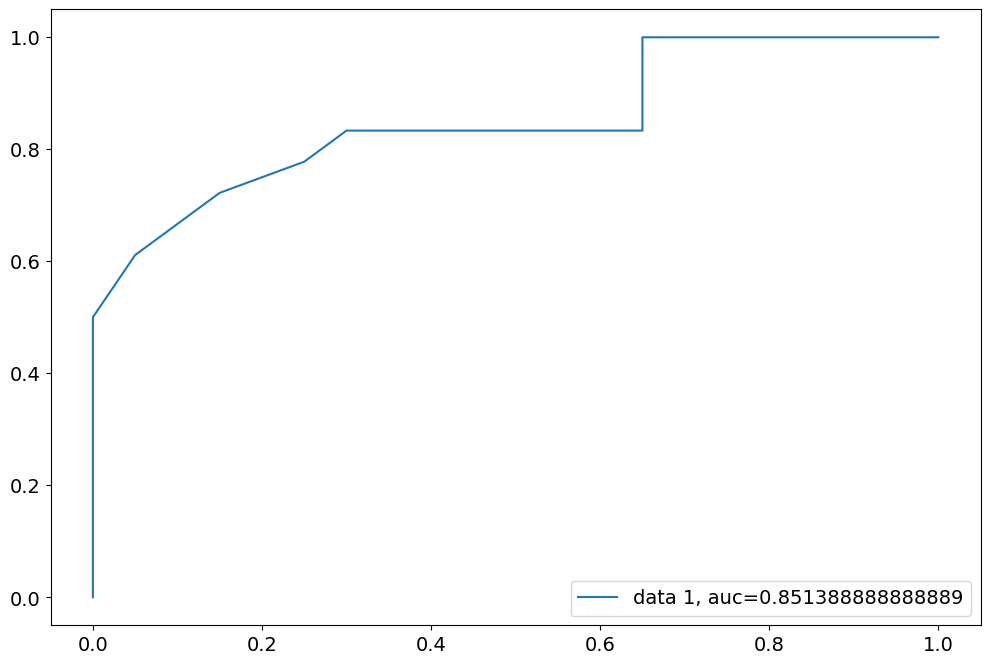

In [73]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression # Import LogisticRegression
import matplotlib.pyplot as plt
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba,pos_label='5')
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [74]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

ValueError: endog and exog matrices are different sizes